# Parte 1a: Análisis de datos

## Importacion de librerias
#### ********************************************************************************************

In [324]:
import pandas as pd
pd.__version__

'2.2.2'

In [325]:
import numpy as np
np.__version__

'1.26.4'

In [326]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.__version__

'3.9.0'

In [327]:
import folium
from folium.plugins import HeatMap
folium.__version__

'0.16.0'

## Carga de datos
#### ********************************************************************************************

In [328]:
df_accidents = pd.read_csv('../datasets/accidents_2017.csv')
df_air_quality = pd.read_csv('../datasets/air_quality_Nov2017.csv')
df_air_stations = pd.read_csv('../datasets/air_stations_Nov2017.csv')
df_births = pd.read_csv('../datasets/births.csv')
df_bus_stops = pd.read_csv('../datasets/bus_stops.csv')
df_deaths = pd.read_csv('../datasets/deaths.csv')
df_immigrants_nationality = pd.read_csv('../datasets/immigrants_by_nationality.csv')
df_immigrants_age = pd.read_csv('../datasets/immigrants_emigrants_by_age.csv')
df_immigrants_destination1 = pd.read_csv('../datasets/immigrants_emigrants_by_destination.csv')
df_immigrants_destination2 = pd.read_csv('../datasets/immigrants_emigrants_by_destination2.csv')
df_immigrants_sex = pd.read_csv('../datasets/immigrants_emigrants_by_sex.csv')
df_life_expectancy = pd.read_csv('../datasets/life_expectancy.csv')
df_baby_names = pd.read_csv('../datasets/most_frequent_baby_names.csv')
df_frequent_names = pd.read_csv('../datasets/most_frequent_names.csv')
df_population = pd.read_csv('../datasets/population.csv')
df_transports = pd.read_csv('../datasets/transports.csv')
df_unemployment = pd.read_csv('../datasets/unemployment.csv')

#### ********************************************************************************************
### Dataset: Accidents 2017
archivo: `accidents_2017.csv`
#### ********************************************************************************************

In [329]:
# Visualizamos las primeras filas del dataset accidents
df_accidents.head()

Id District Name           Neighborhood Name  \
0  2017S008429           Unknown                     Unknown   
1  2017S007316           Unknown                     Unknown   
2  2017S010210           Unknown                     Unknown   
3  2017S006364           Unknown                     Unknown   
4  2017S004615        Sant Martí  el Camp de l'Arpa del Clot   

                                              Street   Weekday      Month  \
0  Número 27                                     ...    Friday    October   
1  Número 3 Zona Franca / Número 50 Zona Franca  ...    Friday  September   
2  Litoral (Besòs)                               ...    Friday   December   
3  Número 3 Zona Franca                          ...    Friday       July   
4  Las Navas de Tolosa                           ...  Thursday        May   

   Day  Hour Part of the day  Mild injuries  Serious injuries  Victims  \
0   13     8         Morning              2                 0        2   
1    1    13         Morning              2                 0        2   
2    8    21       Afternoon              5                 0        5   
3   21     2           Night              1                 0        1   
4   25    14       Afternoon              1                 0        1   

   Vehicles involved  Longitude   Latitude  
0                  2   2.125624  41.340045  
1                  2   2.120452  41.339426  
2                  2   2.167356  41.360886  
3                  2   2.124529  41.337668  
4                  3   2.185272  41.416365

In [330]:
# Visualizamos la forma del dataset accidents
df_accidents.shape

(10339, 15)

In [331]:
# Visualizamos las columnas del dataset accidents
df_accidents.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [332]:
# Visualizamos la informacion del dataset accidents
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [333]:
# Visualizamos la tabla completa del dataset accidents
df_accidents

Id District Name           Neighborhood Name  \
0      2017S008429           Unknown                     Unknown   
1      2017S007316           Unknown                     Unknown   
2      2017S010210           Unknown                     Unknown   
3      2017S006364           Unknown                     Unknown   
4      2017S004615        Sant Martí  el Camp de l'Arpa del Clot   
...                ...           ...                         ...   
10334  2017S003667       Sant Andreu               el Bon Pastor   
10335  2017S001896       Sant Andreu               el Bon Pastor   
10336  2017S010718       Sant Andreu               el Bon Pastor   
10337  2017S006145       Sant Andreu               el Bon Pastor   
10338  2017S000178       Sant Andreu               el Bon Pastor   

                                                  Street    Weekday  \
0      Número 27                                     ...     Friday   
1      Número 3 Zona Franca / Número 50 Zona Franca  ...     Friday   
2      Litoral (Besòs)                               ...     Friday   
3      Número 3 Zona Franca                          ...     Friday   
4      Las Navas de Tolosa                           ...   Thursday   
...                                                  ...        ...   
10334  Litoral (Llobregat)                           ...    Tuesday   
10335  PL MONTERREY                                  ...  Wednesday   
10336  Litoral (Llobregat)                           ...   Thursday   
10337  Litoral (Besòs)                               ...     Friday   
10338  CIUTAT D'ASUNCIÓN                             ...     Sunday   

           Month  Day  Hour Part of the day  Mild injuries  Serious injuries  \
0        October   13     8         Morning              2                 0   
1      September    1    13         Morning              2                 0   
2       December    8    21       Afternoon              5                 0   
3           July   21     2           Night              1                 0   
4            May   25    14       Afternoon              1                 0   
...          ...  ...   ...             ...            ...               ...   
10334      April   25     8         Morning              1                 0   
10335      March    8    12         Morning              1                 0   
10336   December   28     8         Morning              1                 0   
10337       July   14    14       Afternoon              1                 0   
10338    January    8    20       Afternoon              0                 0   

       Victims  Vehicles involved  Longitude   Latitude  
0            2                  2   2.125624  41.340045  
1            2                  2   2.120452  41.339426  
2            5                  2   2.167356  41.360886  
3            1                  2   2.124529  41.337668  
4            1                  3   2.185272  41.416365  
...        ...                ...        ...        ...  
10334        1                  3   2.201800  41.392004  
10335        1                  2   2.206013  41.443445  
10336        1                  2   2.205607  41.443894  
10337        1                  2   2.205118  41.444824  
10338        0                  1   2.200956  41.437125  

[10339 rows x 15 columns]

In [334]:
# Visualizamos las métricas del dataset accidents
df_accidents.describe()

Day          Hour  Mild injuries  Serious injuries  \
count  10339.000000  10339.000000   10339.000000      10339.000000   
mean      15.775994     13.811394       1.154174          0.023310   
std        8.763455      5.316490       0.742294          0.163803   
min        1.000000      0.000000       0.000000          0.000000   
25%        8.000000     10.000000       1.000000          0.000000   
50%       16.000000     14.000000       1.000000          0.000000   
75%       23.000000     18.000000       1.000000          0.000000   
max       31.000000     23.000000      10.000000          4.000000   

            Victims  Vehicles involved     Longitude      Latitude  
count  10339.000000       10339.000000  10339.000000  10339.000000  
mean       1.178644           1.920979      2.162832     41.399346  
std        0.735145           0.714011      0.024176      0.021251  
min        0.000000           0.000000      2.091855     41.323094  
25%        1.000000           2.000000      2.144985     41.386288  
50%        1.000000           2.000000      2.163399     41.396730  
75%        1.000000           2.000000      2.180179     41.411038  
max       10.000000          14.000000      2.222572     41.468244

In [335]:
# Visualizamos la cantidad de valores nulos del dataset accidents
df_accidents.isnull().sum()

Id                   0
District Name        0
Neighborhood Name    0
Street               0
Weekday              0
Month                0
Day                  0
Hour                 0
Part of the day      0
Mild injuries        0
Serious injuries     0
Victims              0
Vehicles involved    0
Longitude            0
Latitude             0
dtype: int64

In [336]:
# Eliminar la columna Id
df_accidents.drop(columns='Id', inplace=True)

In [337]:
# Eliminar las filas que contengan como valor 'Unknown' en la columna 'District Name' o 'Neighborhood Name'
df_accidents = df_accidents[(df_accidents['District Name'] != 'Unknown') & (df_accidents['Neighborhood Name'] != 'Unknown')]

In [338]:
# Visualizamos la cabeza del dataset accidents sin los valores 'Unknown'
df_accidents.head()

District Name           Neighborhood Name  \
4    Sant Martí  el Camp de l'Arpa del Clot   
5    Sant Martí  el Camp de l'Arpa del Clot   
6    Sant Martí  el Camp de l'Arpa del Clot   
7    Sant Martí  el Camp de l'Arpa del Clot   
8    Sant Martí  el Camp de l'Arpa del Clot   

                                              Street    Weekday      Month  \
4  Las Navas de Tolosa                           ...   Thursday        May   
5  Indústria / Trinxant                          ...  Wednesday  September   
6  Trinxant / Indústria                          ...   Saturday        May   
7  Indústria                                     ...    Tuesday   December   
8  Indústria                                     ...     Monday       June   

   Day  Hour Part of the day  Mild injuries  Serious injuries  Victims  \
4   25    14       Afternoon              1                 0        1   
5   20    12         Morning              1                 0        1   
6   20    21       Afternoon              1                 0        1   
7   26    20       Afternoon              2                 0        2   
8   12    15       Afternoon              1                 0        1   

   Vehicles involved  Longitude   Latitude  
4                  3   2.185272  41.416365  
5                  2   2.183245  41.416336  
6                  2   2.183245  41.416336  
7                  1   2.183561  41.416372  
8                  1   2.184059  41.416763

In [339]:
# Visualizamos la cantidad de valores del dataset
df_accidents.shape

(10312, 14)

In [340]:
# Mes con mas accidentes
df_accidents['Month'].value_counts()


Month
November     989
May          961
March        935
October      922
July         915
June         903
April        845
January      841
February     823
September    766
December     760
August       652
Name: count, dtype: int64

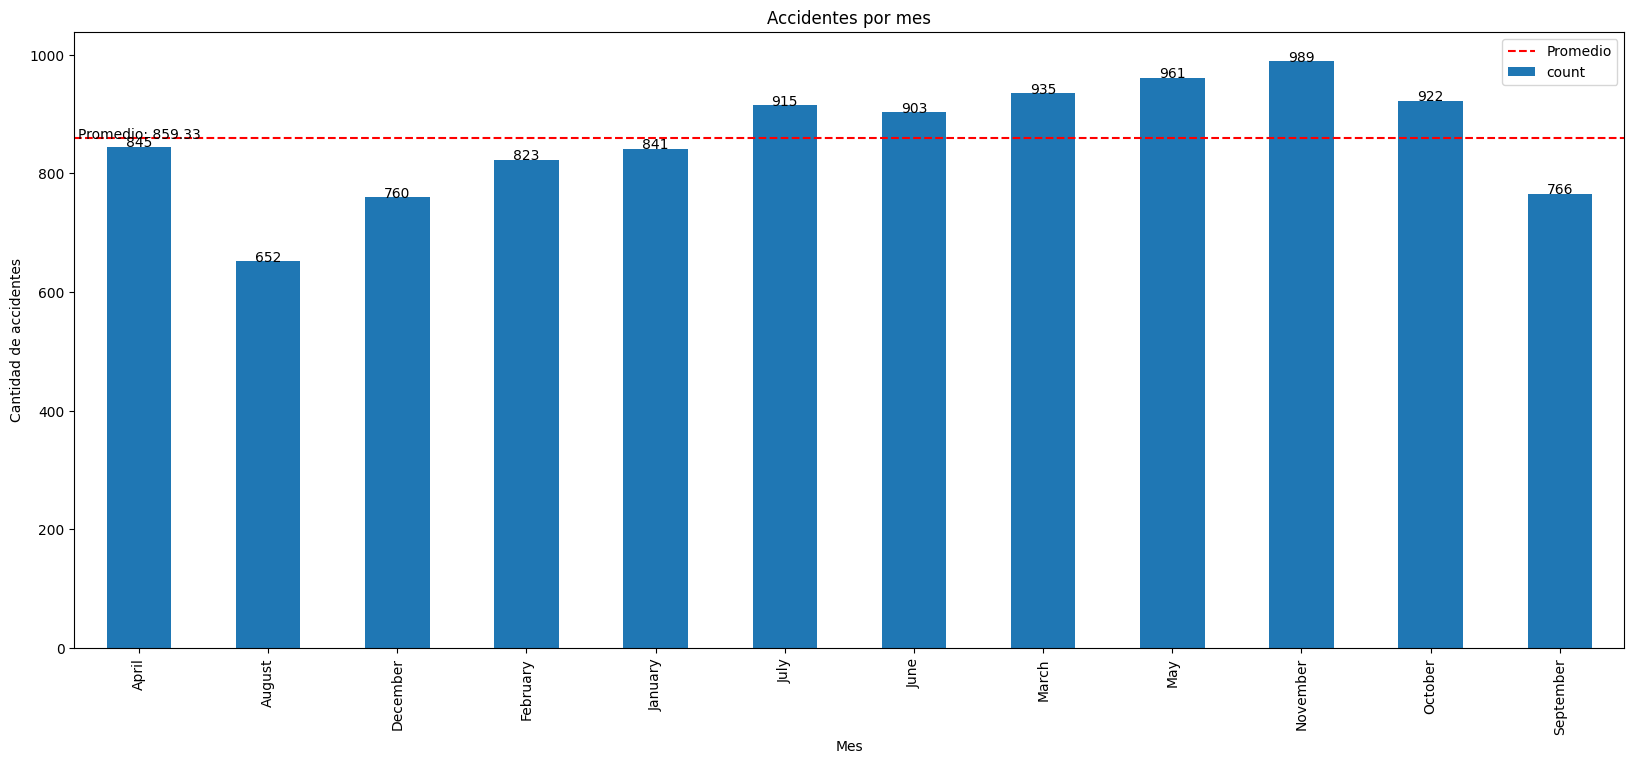

In [341]:
# Grafica de los meses con mas accidentes
df_accidents['Month'].value_counts().sort_index().plot(kind='bar', figsize=(20,8))
plt.title('Accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
# Valor de cada barra
for index, value in enumerate(df_accidents['Month'].value_counts().sort_index()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents['Month'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['Month'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['Month'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [342]:
# Visualizar el horario del dia mas comun en el que se producen accidentes
df_accidents['Hour'].value_counts()

Hour
14    735
13    718
18    674
15    665
19    646
16    644
9     639
17    635
12    622
8     608
20    583
11    504
10    494
21    488
22    352
7     306
23    207
0     185
6     163
1     134
5      92
4      82
2      80
3      56
Name: count, dtype: int64

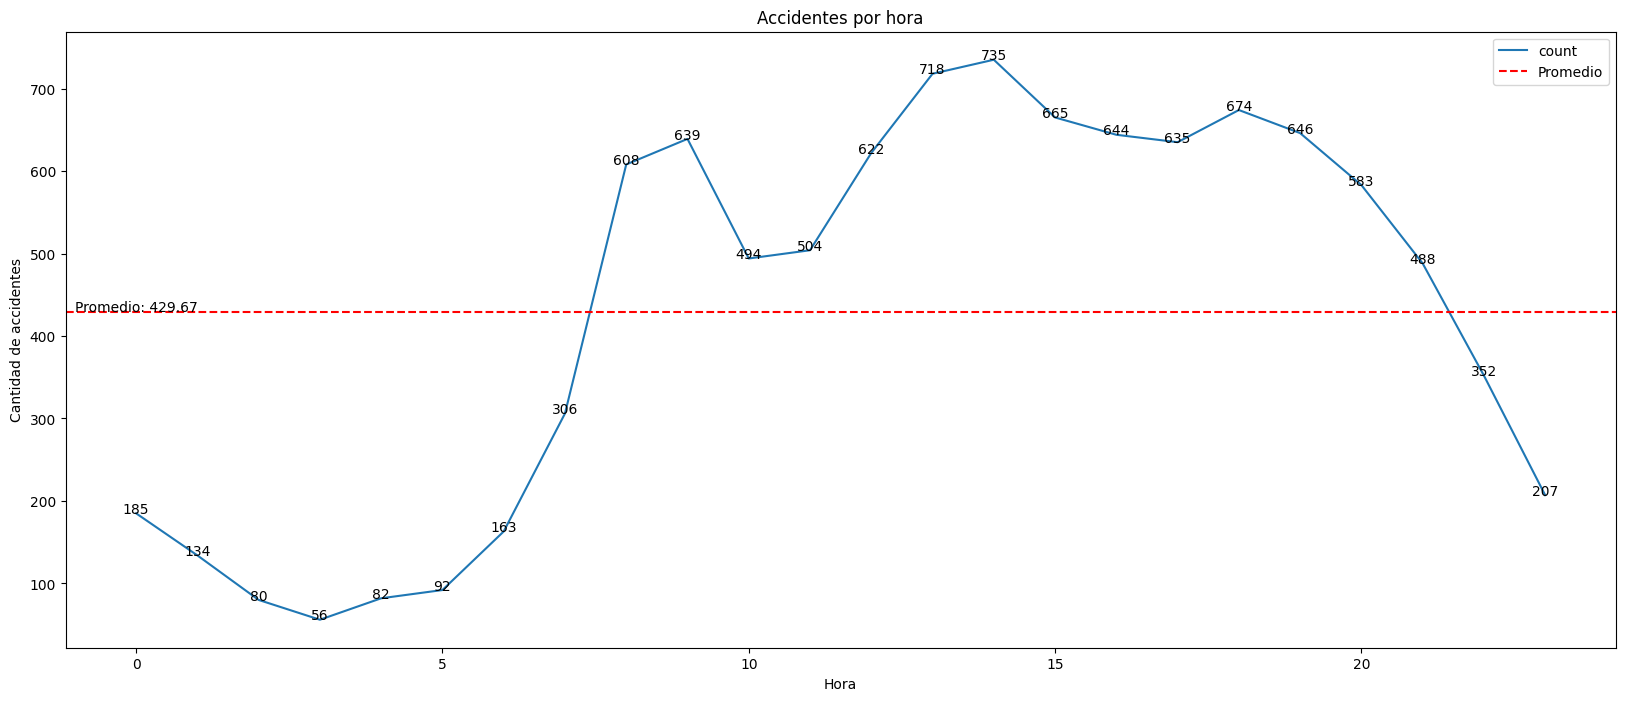

In [343]:
# Grafica de las horas del dia en las que se producen accidentes
df_accidents['Hour'].value_counts().sort_index().plot(kind='line', figsize=(20,8))
plt.title('Accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de accidentes')
# Valor de cada barra
for index, value in enumerate(df_accidents['Hour'].value_counts().sort_index()):
    plt.text(index, value, str(value), ha='center')

# Linea de promedio
plt.axhline(y=df_accidents['Hour'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['Hour'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['Hour'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [344]:
# Visualizar el dia de la semana mas comun en el que se producen accidentes
df_accidents['Weekday'].value_counts()

Weekday
Friday       1754
Tuesday      1687
Thursday     1675
Wednesday    1646
Monday       1506
Saturday     1153
Sunday        891
Name: count, dtype: int64

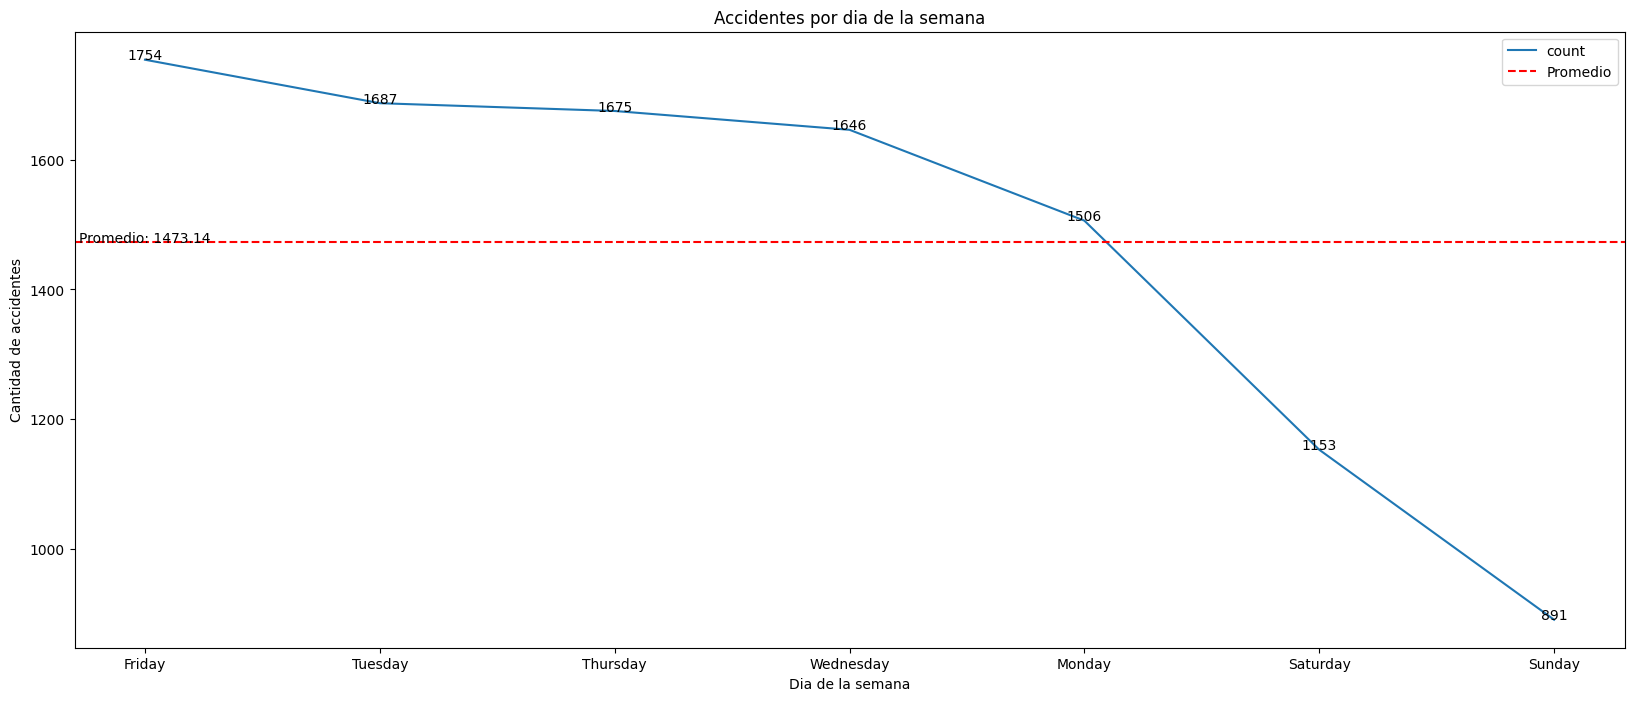

In [345]:
# Graficar los dias de la semana en los que se producen accidentes en grafica de puntos
df_accidents['Weekday'].value_counts().plot(kind='line', figsize=(20,8))
plt.title('Accidentes por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de accidentes')

# Valor de cada barra
for index, value in enumerate(df_accidents['Weekday'].value_counts()):
    plt.text(index, value, str(value), ha='center')

# Linea de promedio
plt.axhline(y=df_accidents['Weekday'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['Weekday'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['Weekday'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [346]:
# Visualizar la cantidad de accidentes por distrito
df_accidents['District Name'].value_counts()

District Name
Eixample               3029
Sant Martí             1336
Sants-Montjuïc         1104
Sarrià-Sant Gervasi    1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Name: count, dtype: int64

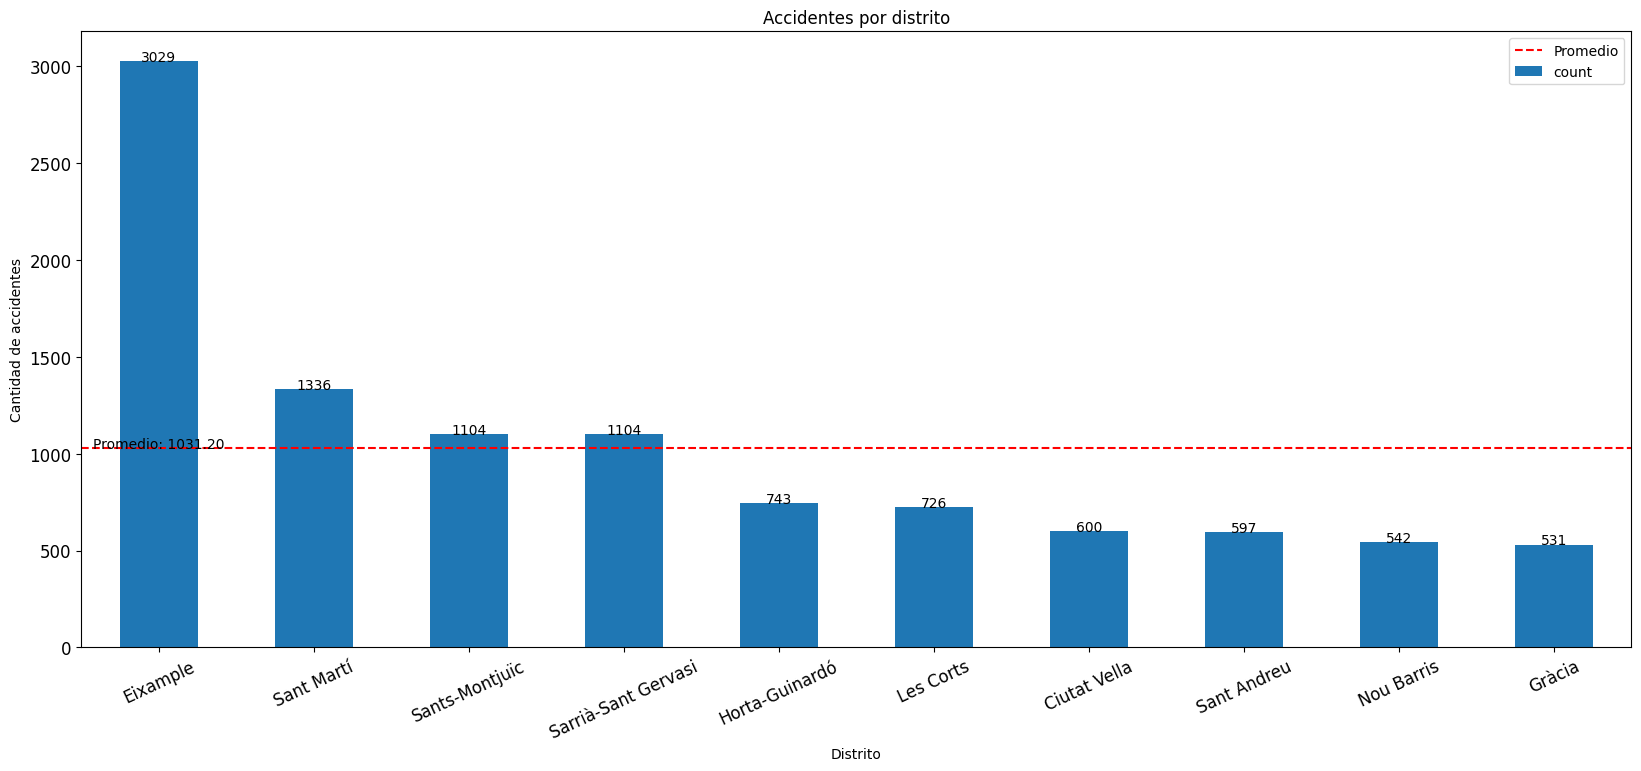

In [347]:
# Graficar la cantidad de accidentes por distrito en un grafico de barras
df_accidents['District Name'].value_counts().plot(kind='bar', figsize=(20,8))
plt.title('Accidentes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de accidentes')

# Tamaño de texto de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=25)

# Agregar el valor de cada barra
for index, value in enumerate(df_accidents['District Name'].value_counts()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents['District Name'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents['District Name'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_accidents['District Name'].value_counts().mean()), ha='center')
plt.legend()

plt.show()

In [348]:
# Visualizar la cantidad de accidentes por distrito en porcentaje mostrado como entero de 0 a 100
df_accidents['District Name'].value_counts(normalize=True) * 100

District Name
Eixample               29.373545
Sant Martí             12.955780
Sants-Montjuïc         10.705974
Sarrià-Sant Gervasi    10.705974
Horta-Guinardó          7.205198
Les Corts               7.040341
Ciutat Vella            5.818464
Sant Andreu             5.789372
Nou Barris              5.256012
Gràcia                  5.149341
Name: proportion, dtype: float64

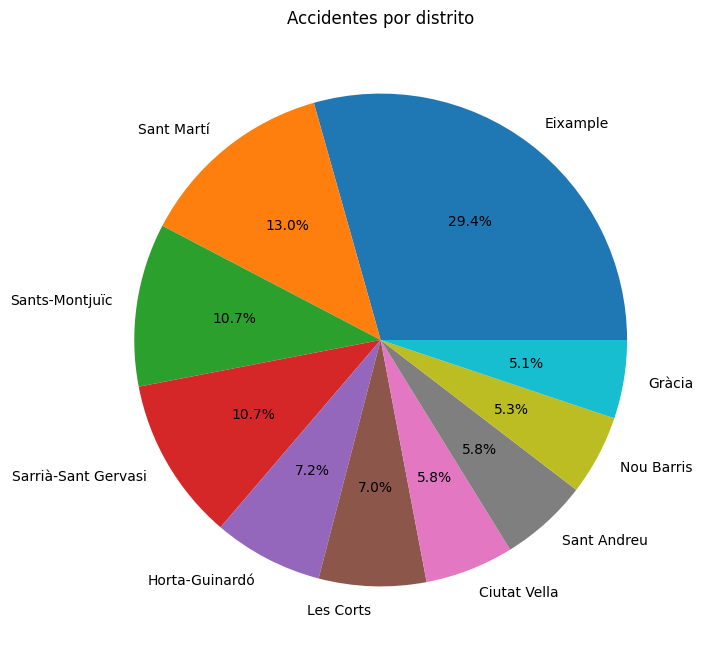

In [349]:
# Graficar la cantidad de accidentes por distrito en un grafico de pastel
df_accidents['District Name'].value_counts().plot(kind='pie', figsize=(26,8), autopct='%1.1f%%')
plt.title('Accidentes por distrito')
plt.ylabel('')
plt.show()

In [350]:
# Cantidad de heridos leves por distrito
df_accidents.groupby('District Name')['Mild injuries'].sum()

District Name
Ciutat Vella            623
Eixample               3499
Gràcia                  576
Horta-Guinardó          827
Les Corts               865
Nou Barris              647
Sant Andreu             693
Sant Martí             1593
Sants-Montjuïc         1305
Sarrià-Sant Gervasi    1266
Name: Mild injuries, dtype: int64

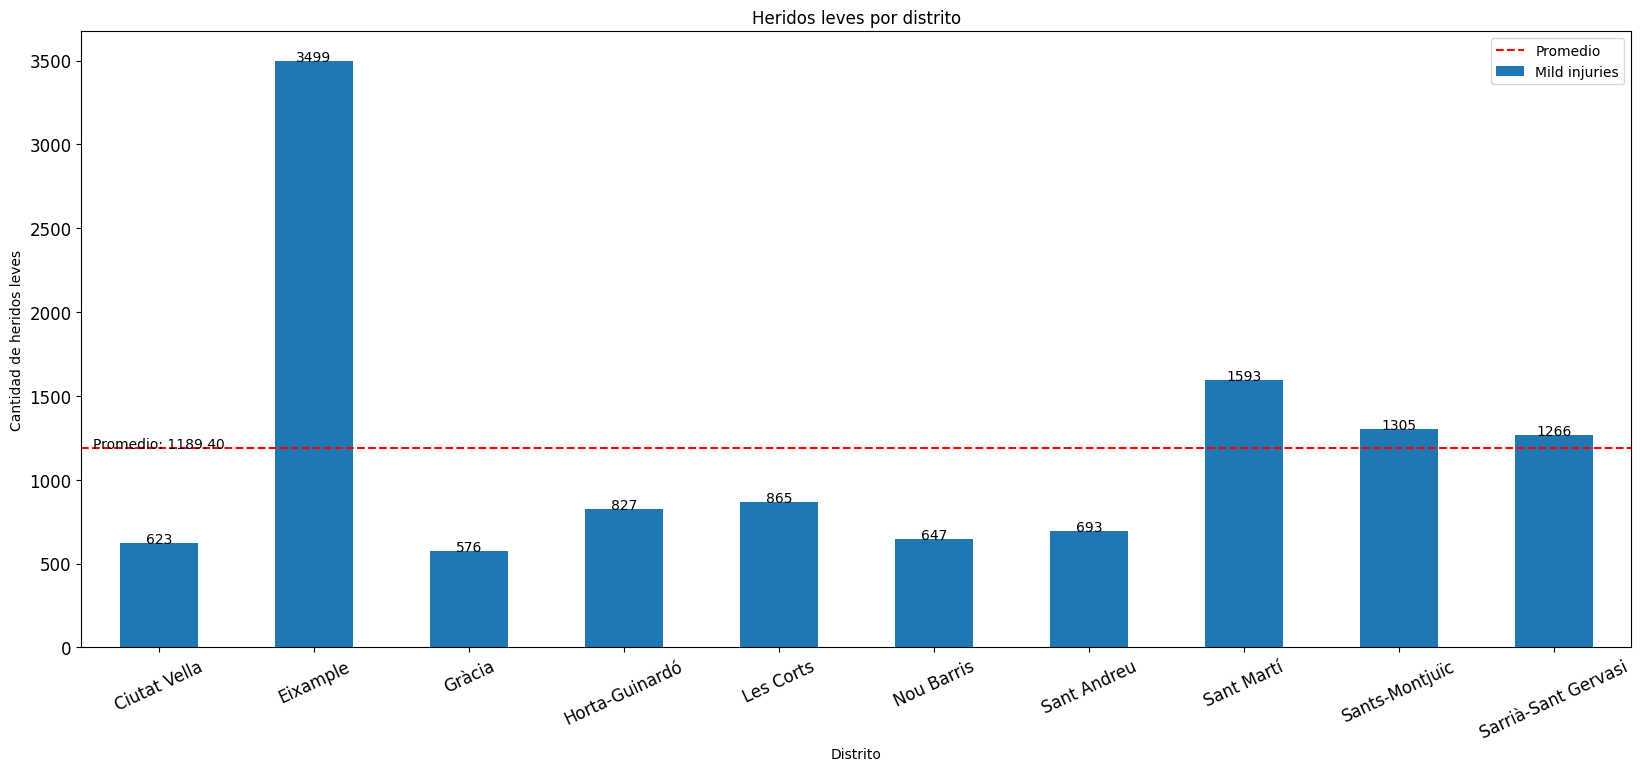

In [351]:
# Graficar la cantidad de heridos leves por distrito en un grafico de barras
df_accidents.groupby('District Name')['Mild injuries'].sum().plot(kind='bar', figsize=(20,8))
plt.title('Heridos leves por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de heridos leves')

# Tamaño de texto de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=25)

# Agregar el valor de cada barra
for index, value in enumerate(df_accidents.groupby('District Name')['Mild injuries'].sum()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents.groupby('District Name')['Mild injuries'].sum().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents.groupby('District Name')['Mild injuries'].sum().mean(), 'Promedio: {:.2f}'.format(df_accidents.groupby('District Name')['Mild injuries'].sum().mean()), ha='center')
plt.legend()

plt.show()

In [352]:
# Cantidad de heridos graves por distrito
df_accidents.groupby('District Name')['Serious injuries'].sum()

District Name
Ciutat Vella           11
Eixample               60
Gràcia                 12
Horta-Guinardó         10
Les Corts              27
Nou Barris             13
Sant Andreu            11
Sant Martí             51
Sants-Montjuïc         21
Sarrià-Sant Gervasi    24
Name: Serious injuries, dtype: int64

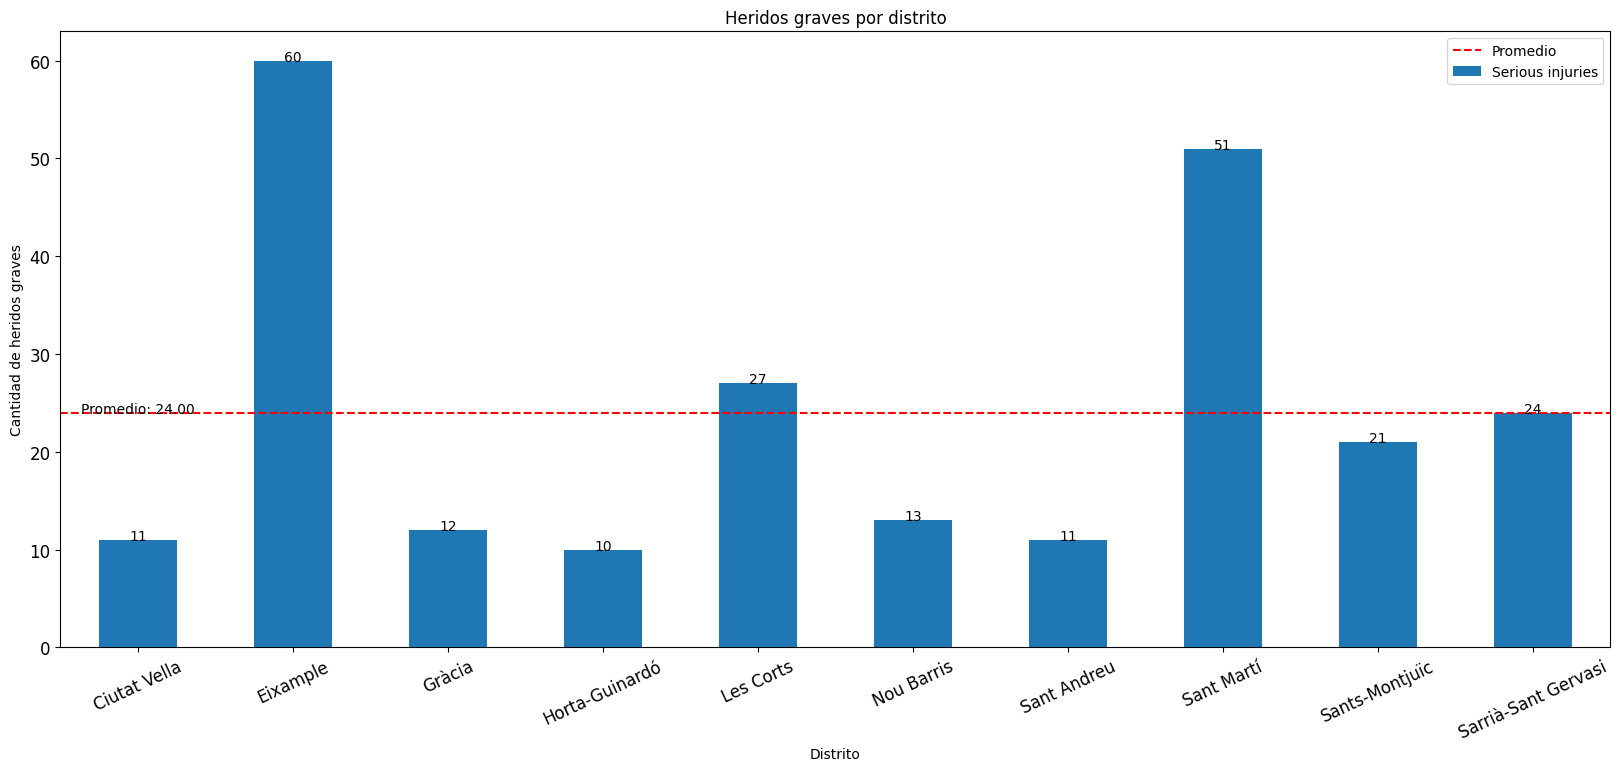

In [353]:
# Graficar la cantidad de heridos graves por distrito en un grafico de barras
df_accidents.groupby('District Name')['Serious injuries'].sum().plot(kind='bar', figsize=(20,8))
plt.title('Heridos graves por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de heridos graves')

# Tamaño de texto de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=25)

# Agregar el valor de cada barra
for index, value in enumerate(df_accidents.groupby('District Name')['Serious injuries'].sum()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_accidents.groupby('District Name')['Serious injuries'].sum().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_accidents.groupby('District Name')['Serious injuries'].sum().mean(), 'Promedio: {:.2f}'.format(df_accidents.groupby('District Name')['Serious injuries'].sum().mean()), ha='center')
plt.legend()

plt.show()

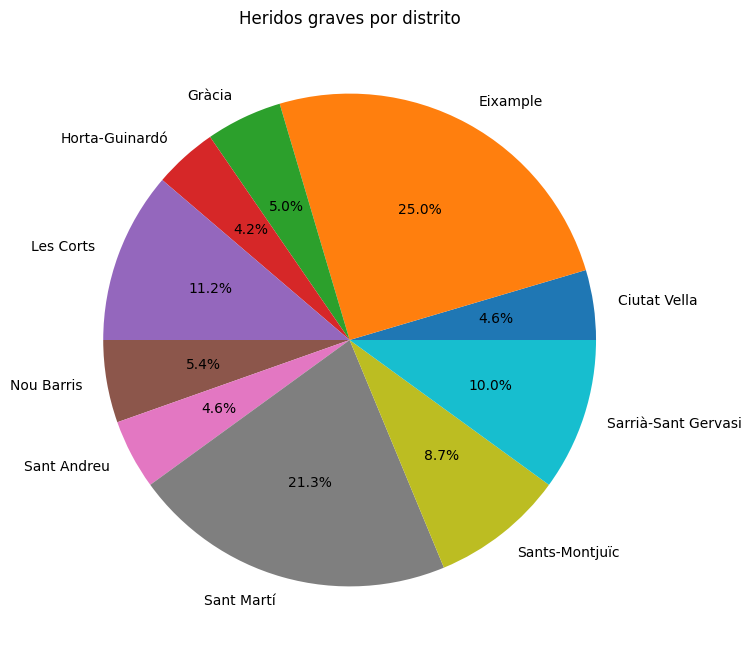

In [354]:
# Graficar la cantidad de heridos graves por distrito en un grafico de pastel
df_accidents.groupby('District Name')['Serious injuries'].sum().plot(kind='pie', figsize=(26,8), autopct='%1.1f%%')
plt.title('Heridos graves por distrito')
plt.ylabel('')
plt.show()

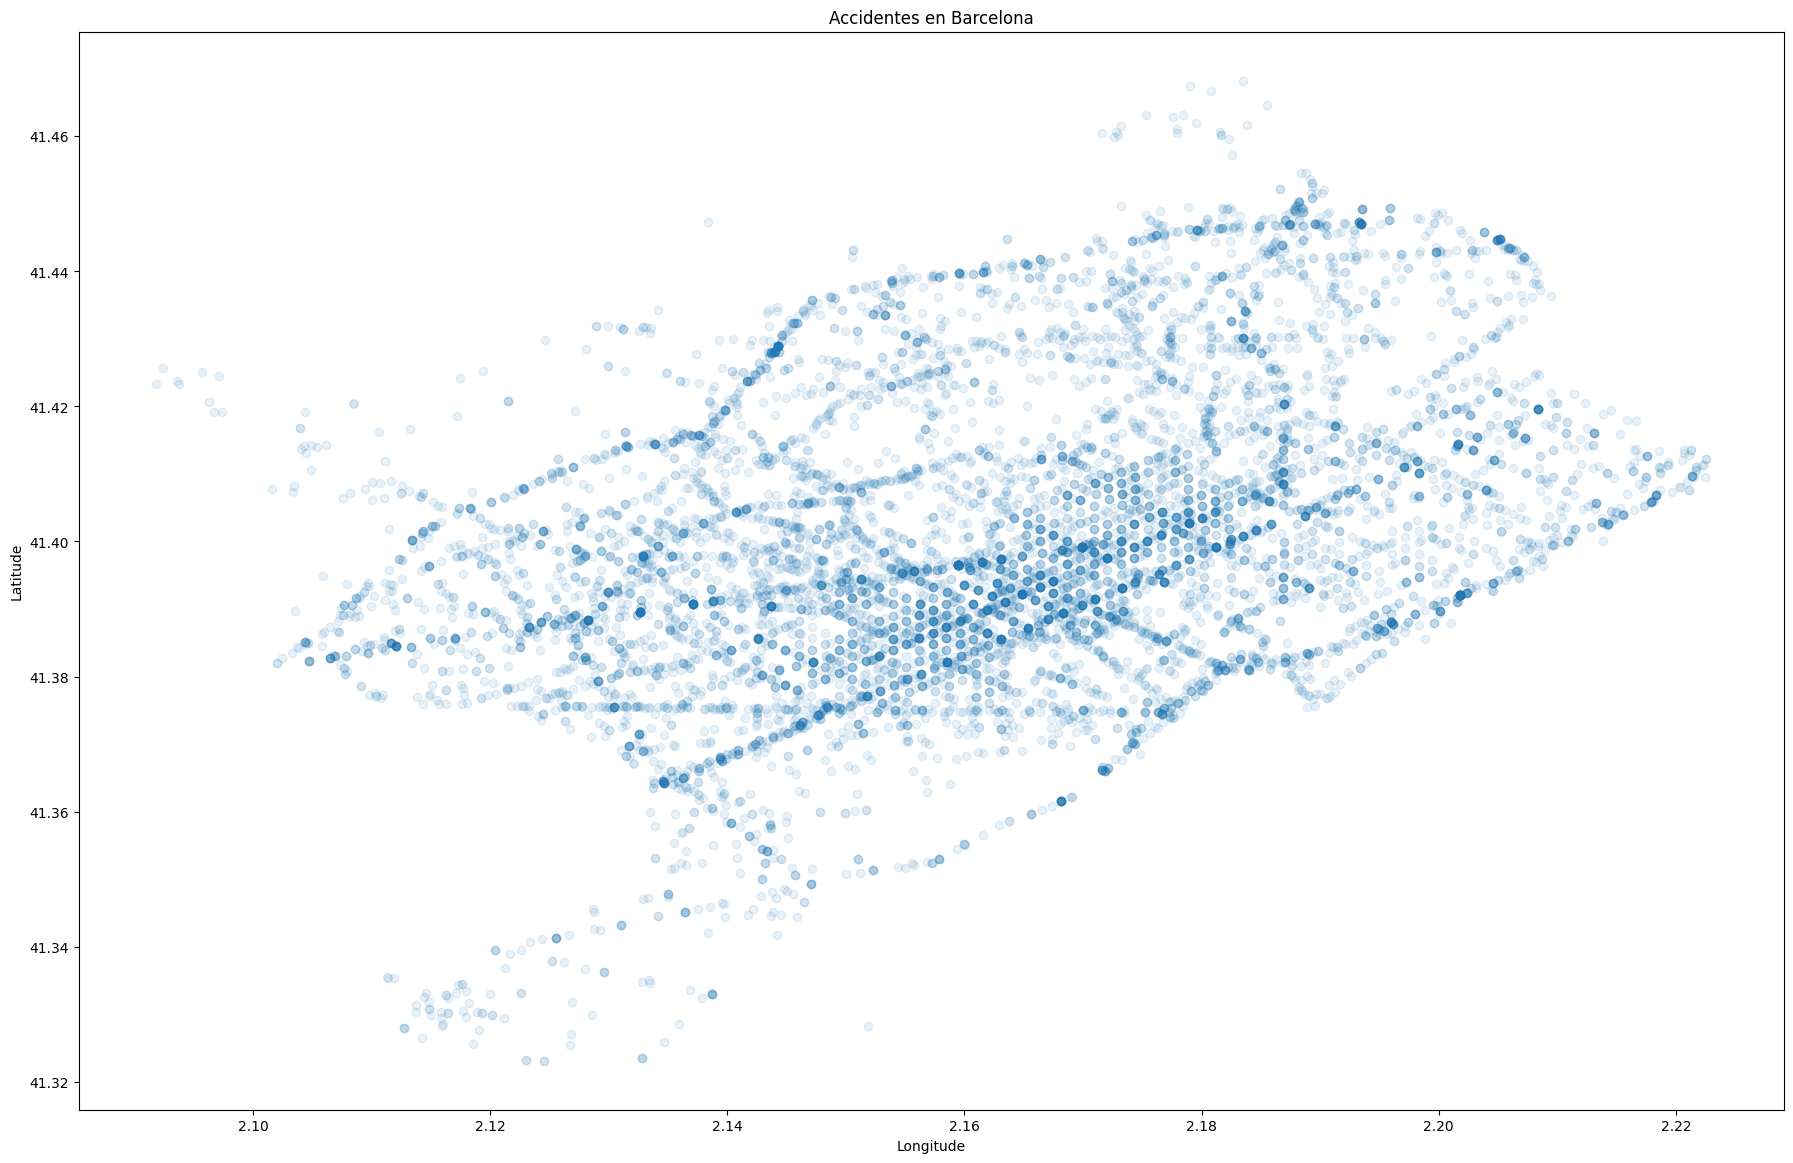

In [355]:
# Plotear con pyplot de matplotlib
plt.figure(figsize=(22,14))
plt.scatter(df_accidents['Longitude'], df_accidents['Latitude'], alpha=0.1)
plt.title('Accidentes en Barcelona')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [356]:
# Plotear con folium
map_accidents = folium.Map(location=[41.388790, 2.158990], zoom_start=12)
HeatMap(data=df_accidents[['Latitude', 'Longitude']], radius=15).add_to(map_accidents)
map_accidents

In [357]:
# Guardar el nuevo dataset accidents 
df_accidents.to_csv('../new_datasets/new_accidents_2017.csv', index=False)

#### ********************************************************************************************
### Dataset: Air Quality Nov 2017 
archivo: `air_quality_Nov2017.csv`
#### ********************************************************************************************

In [358]:
df_air_quality.head()

Station Air Quality  Longitude  Latitude O3 Hour  \
0        Barcelona - Sants        Good     2.1331   41.3788     NaN   
1     Barcelona - Eixample    Moderate     2.1538   41.3853      0h   
2       Barcelona - Gràcia        Good     2.1534   41.3987      0h   
3   Barcelona - Ciutadella        Good     2.1874   41.3864      0h   
4  Barcelona - Vall Hebron        Good     2.1480   41.4261      0h   

  O3 Quality  O3 Value NO2 Hour NO2 Quality  NO2 Value PM10 Hour PM10 Quality  \
0        NaN       NaN       0h        Good       84.0       NaN          NaN   
1       Good       1.0       0h    Moderate      113.0        0h         Good   
2       Good      10.0       0h        Good       73.0       NaN          NaN   
3       Good       2.0       0h        Good       86.0       NaN          NaN   
4       Good       7.0       0h        Good       69.0       NaN          NaN   

   PM10 Value        Generated   Date Time  
0         NaN  01/11/2018 0:00  1541027104  
1        36.0  01/11/2018 0:00  1541027104  
2         NaN  01/11/2018 0:00  1541027104  
3         NaN  01/11/2018 0:00  1541027104  
4         NaN  01/11/2018 0:00  1541027104

In [359]:
df_air_quality.shape

(5744, 15)

In [360]:
df_air_quality.columns

Index(['Station', 'Air Quality', 'Longitude', 'Latitude', 'O3 Hour',
       'O3 Quality', 'O3 Value', 'NO2 Hour', 'NO2 Quality', 'NO2 Value',
       'PM10 Hour', 'PM10 Quality', 'PM10 Value', 'Generated', 'Date Time'],
      dtype='object')

In [361]:
df_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station       5744 non-null   object 
 1   Air Quality   5744 non-null   object 
 2   Longitude     5744 non-null   float64
 3   Latitude      5744 non-null   float64
 4   O3 Hour       4268 non-null   object 
 5   O3 Quality    4268 non-null   object 
 6   O3 Value      4101 non-null   float64
 7   NO2 Hour      5689 non-null   object 
 8   NO2 Quality   5689 non-null   object 
 9   NO2 Value     5460 non-null   float64
 10  PM10 Hour     3722 non-null   object 
 11  PM10 Quality  3722 non-null   object 
 12  PM10 Value    3647 non-null   float64
 13  Generated     5744 non-null   object 
 14  Date Time     5744 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 673.3+ KB


In [362]:
df_air_quality.describe()

Longitude       Latitude     O3 Value    NO2 Value   PM10 Value  \
count  5744.00000    5744.000000  4101.000000  5460.000000  3647.000000   
mean      2.15240   13877.827714    34.082907    35.740293    16.590074   
std       0.02859   74410.803168    22.960687    22.357262     8.065424   
min       2.11510      41.378800     1.000000     1.000000     2.000000   
25%       2.13080      41.386400    14.000000    17.000000    10.000000   
50%       2.15070      41.398700    34.000000    33.000000    15.000000   
75%       2.16220      41.418300    52.000000    52.000000    22.000000   
max       2.20450  414261.000000   100.000000   117.000000    44.000000   

          Date Time  
count  5.744000e+03  
mean   1.542323e+09  
std    7.483961e+05  
min    1.541027e+09  
25%    1.541675e+09  
50%    1.542325e+09  
75%    1.542971e+09  
max    1.543616e+09

In [363]:
df_air_quality.isnull().sum()

Station            0
Air Quality        0
Longitude          0
Latitude           0
O3 Hour         1476
O3 Quality      1476
O3 Value        1643
NO2 Hour          55
NO2 Quality       55
NO2 Value        284
PM10 Hour       2022
PM10 Quality    2022
PM10 Value      2097
Generated          0
Date Time          0
dtype: int64

#### ********************************************************************************************
### Dataset: Air Stations Nov 2017 
archivo: `air_stations_Nov2017.csv`
#### ********************************************************************************************

In [364]:
df_air_stations.head()

Station  Longitude  Latitude  \
0   Barcelona - Ciutadella     2.1874   41.3864   
1     Barcelona - Eixample     2.1538   41.3853   
2       Barcelona - Gràcia     2.1534   41.3987   
3  Barcelona - Palau Reial     2.1151   41.3875   
4     Barcelona - Poblenou     2.2045   41.4039   

                                           Ubication District Name  \
0                              Parc de la Ciutadella  Ciutat Vella   
1                         Av. Roma - c/ Comte Urgell      Eixample   
2  Plaça Gal·la Placídia (Via Augusta - Travesser...        Gracia   
3        c/ John Maynard Keynes - c/ de Jordi Girona     Les Corts   
4        Plaça Josep Trueta (Pujades - Lope de Vega)    Sant Marti   

                       Neighborhood Name  
0  Sant Pere, Santa Caterina i la Ribera  
1         la Nova Esquerra de l'Eixample  
2                      la Vila de Gracia  
3                              Pedralbes  
4                            el Poblenou

In [365]:
df_air_stations.shape

(8, 6)

In [366]:
df_air_stations.columns

Index(['Station', 'Longitude', 'Latitude', 'Ubication', 'District Name',
       'Neighborhood Name'],
      dtype='object')

In [367]:
df_air_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station            8 non-null      object 
 1   Longitude          8 non-null      float64
 2   Latitude           8 non-null      float64
 3   Ubication          8 non-null      object 
 4   District Name      8 non-null      object 
 5   Neighborhood Name  8 non-null      object 
dtypes: float64(2), object(4)
memory usage: 516.0+ bytes


In [368]:
df_air_stations.describe()

Longitude   Latitude
count   8.000000   8.000000
mean    2.152050  41.398038
std     0.030947   0.016834
min     2.115100  41.378800
25%     2.130100  41.386125
50%     2.150700  41.393100
75%     2.162200  41.407325
max     2.204500  41.426100

In [369]:
df_air_stations.isnull().sum()

Station              0
Longitude            0
Latitude             0
Ubication            0
District Name        0
Neighborhood Name    0
dtype: int64

In [370]:
df_air_stations

Station  Longitude  Latitude  \
0                             Barcelona - Ciutadella     2.1874   41.3864   
1                               Barcelona - Eixample     2.1538   41.3853   
2                                 Barcelona - Gràcia     2.1534   41.3987   
3                            Barcelona - Palau Reial     2.1151   41.3875   
4                               Barcelona - Poblenou     2.2045   41.4039   
5                                  Barcelona - Sants     2.1331   41.3788   
6                            Barcelona - Vall Hebron     2.1480   41.4261   
7  Barcelona - Vallvidrera, el Tibidabo i les Planes     2.1211   41.4176   

                                           Ubication        District Name  \
0                              Parc de la Ciutadella         Ciutat Vella   
1                         Av. Roma - c/ Comte Urgell             Eixample   
2  Plaça Gal·la Placídia (Via Augusta - Travesser...               Gracia   
3        c/ John Maynard Keynes - c/ de Jordi Girona            Les Corts   
4        Plaça Josep Trueta (Pujades - Lope de Vega)           Sant Marti   
5  Jardins de Can Mantega (Joan Güell - Violant d...       Sants-Montjuic   
6  Parc de la Vall d’Hebron - c/ Martí Codolar - ...       Horta-Guinardo   
7                         Ctra Observatori Fabra, 27  Sarrià-Sant Gervasi   

                       Neighborhood Name  
0  Sant Pere, Santa Caterina i la Ribera  
1         la Nova Esquerra de l'Eixample  
2                      la Vila de Gracia  
3                              Pedralbes  
4                            el Poblenou  
5                                  Sants  
6                       la Vall d'Hebron  
7  Vallvidrera, el Tibidabo i les Planes

In [371]:
# Cambiar el nombre de la columna 'Station', Sacar el String Barcelona - 
df_air_stations['Station'] = df_air_stations['Station'].str.split(' - ').str[1]


In [372]:
# Graficar las air stations en un mapa
map_air_stations = folium.Map(location=[41.388790, 2.158990], zoom_start=13)
for index, row in df_air_stations.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Station']).add_to(map_air_stations)
    
map_air_stations

In [373]:
# Guardar el nuevo dataset air stations 
df_air_stations.to_csv('../new_datasets/new_air_stations.csv', index=False)

#### ********************************************************************************************
### Dataset: Births
archivo: `births.csv`
#### ********************************************************************************************

In [374]:
df_births.head()

Year  District Code District Name  Neighborhood Code  \
0  2017              1  Ciutat Vella                  1   
1  2017              1  Ciutat Vella                  2   
2  2017              1  Ciutat Vella                  3   
3  2017              1  Ciutat Vella                  4   
4  2017              2      Eixample                  5   

                       Neighborhood Name Gender  Number  
0                               el Raval   Boys     283  
1                         el Barri Gòtic   Boys      56  
2                         la Barceloneta   Boys      51  
3  Sant Pere, Santa Caterina i la Ribera   Boys      90  
4                          el Fort Pienc   Boys     117

In [375]:
df_births.shape

(734, 7)

In [376]:
df_births.columns

Index(['Year', 'District Code', 'District Name', 'Neighborhood Code',
       'Neighborhood Name', 'Gender', 'Number'],
      dtype='object')

In [377]:
df_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               734 non-null    int64 
 1   District Code      734 non-null    int64 
 2   District Name      734 non-null    object
 3   Neighborhood Code  734 non-null    int64 
 4   Neighborhood Name  734 non-null    object
 5   Gender             734 non-null    object
 6   Number             734 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 40.3+ KB


In [378]:
df_births.describe()

Year  District Code  Neighborhood Code      Number
count   734.000000     734.000000         734.000000  734.000000
mean   2014.997275       6.752044          37.337875   91.754768
std       1.416139       7.378009          21.518487   61.928488
min    2013.000000       1.000000           1.000000    0.000000
25%    2014.000000       4.000000          19.000000   43.250000
50%    2015.000000       7.000000          37.000000   84.500000
75%    2016.000000       8.000000          55.750000  129.250000
max    2017.000000      99.000000          99.000000  283.000000

In [379]:
df_births.isnull().sum()

Year                 0
District Code        0
District Name        0
Neighborhood Code    0
Neighborhood Name    0
Gender               0
Number               0
dtype: int64

In [380]:
# Eliminar la fila con el distrito "No consta"
df_births = df_births[df_births['District Name'] != 'No consta']

In [ ]:
# Graficar la cantidad de nacimientos por año sumando la columna Number por cada año.
df_births.groupby('District Name')['Number'].sum().plot(kind='bar', figsize=(20,8))


<Axes: xlabel='District Name'>

In [ ]:
# Graficar la cantidad de nacimientos por distrito en un grafico de barras discriminado por sexo y año
df_births.groupby(['District Name', 'Year'])['Number'].sum().unstack().plot(kind='bar', figsize=(20,8))

plt.title('Nacimientos por distrito en cada año')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de nacimientos')

# plotear
plt.show()

In [226]:
# Guardar el nuevo dataset births
df_births.to_csv('../new_datasets/new_births.csv', index=False)

#### ********************************************************************************************
### Dataset: Bus Stops
archivo: `bus_stops.csv`
#### ********************************************************************************************

In [227]:
df_bus_stops.head()

Code     Transport  Longitude   Latitude    Bus.Stop        District.Name  \
0  K014  Day bus stop   2.171619  41.413744  BUS -192--       Horta-Guinardó   
1  K014  Day bus stop   2.134902  41.420222  BUS -124--               Gràcia   
2  K014  Day bus stop   2.162913  41.423187  BUS -117--       Horta-Guinardó   
3  K014  Day bus stop   2.163667  41.422899  BUS -117--       Horta-Guinardó   
4  K014  Day bus stop   2.120212  41.397209  BUS -130--  Sarrià-Sant Gervasi   

           Neighborhood.Name  
0                el Guinardó  
1  Vallcarca i els Penitents  
2       la Font d'en Fargues  
3       la Font d'en Fargues  
4                     Sarrià

In [228]:
df_bus_stops.shape

(3162, 7)

In [229]:
df_bus_stops.columns

Index(['Code', 'Transport', 'Longitude', 'Latitude', 'Bus.Stop',
       'District.Name', 'Neighborhood.Name'],
      dtype='object')

In [230]:
df_bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               3162 non-null   object 
 1   Transport          3162 non-null   object 
 2   Longitude          3162 non-null   float64
 3   Latitude           3162 non-null   float64
 4   Bus.Stop           3162 non-null   object 
 5   District.Name      3146 non-null   object 
 6   Neighborhood.Name  3146 non-null   object 
dtypes: float64(2), object(5)
memory usage: 173.1+ KB


In [231]:
df_bus_stops.describe()

Longitude     Latitude
count  3162.000000  3162.000000
mean      2.159824    41.405002
std       0.027898     0.027150
min       2.055835    41.321643
25%       2.140627    41.386903
50%       2.161103    41.405734
75%       2.180406    41.423526
max       2.221753    41.467592

In [232]:
df_bus_stops.isnull().sum()

Code                  0
Transport             0
Longitude             0
Latitude              0
Bus.Stop              0
District.Name        16
Neighborhood.Name    16
dtype: int64

In [233]:
# mostrar los District.Name nulos
df_bus_stops[df_bus_stops['District.Name'].isnull()]

Code       Transport  Longitude   Latitude              Bus.Stop  \
215   K015  Night bus stop   2.175509  41.463715          NITBUS -N3--   
269   K014    Day bus stop   2.175149  41.463839            BUS -104--   
293   K014    Day bus stop   2.132912  41.359207         BUS -79-125--   
443   K015  Night bus stop   2.209424  41.425163      NITBUS -N11-N2--   
1204  K014    Day bus stop   2.055835  41.365599     BUS -78-L46-L52--   
1232  K014    Day bus stop   2.209424  41.425163        BUS -B25-V33--   
1236  K014    Day bus stop   2.124490  41.373531            BUS -LH2--   
1378  K014    Day bus stop   2.175509  41.463715   BUS -62-76-104-83--   
1427  K014    Day bus stop   2.114631  41.375908  BUS -54-157-D20-H8--   
1428  K015  Night bus stop   2.114631  41.375908      NITBUS -N14-N3--   
1523  K015  Night bus stop   2.211892  41.421783          NITBUS -N2--   
1566  K014    Day bus stop   2.120534  41.425856            BUS -111--   
1634  K015  Night bus stop   2.055835  41.365599         NITBUS -N15--   
2409  K014    Day bus stop   2.221753  41.413193        BUS -H16-V33--   
2495  K014    Day bus stop   2.095815  41.433073            BUS -128--   
2806  K014    Day bus stop   2.217777  41.418108            BUS -V33--   

     District.Name Neighborhood.Name  
215            NaN               NaN  
269            NaN               NaN  
293            NaN               NaN  
443            NaN               NaN  
1204           NaN               NaN  
1232           NaN               NaN  
1236           NaN               NaN  
1378           NaN               NaN  
1427           NaN               NaN  
1428           NaN               NaN  
1523           NaN               NaN  
1566           NaN               NaN  
1634           NaN               NaN  
2409           NaN               NaN  
2495           NaN               NaN  
2806           NaN               NaN

Text(0, 314.6, 'Promedio: 314.60')

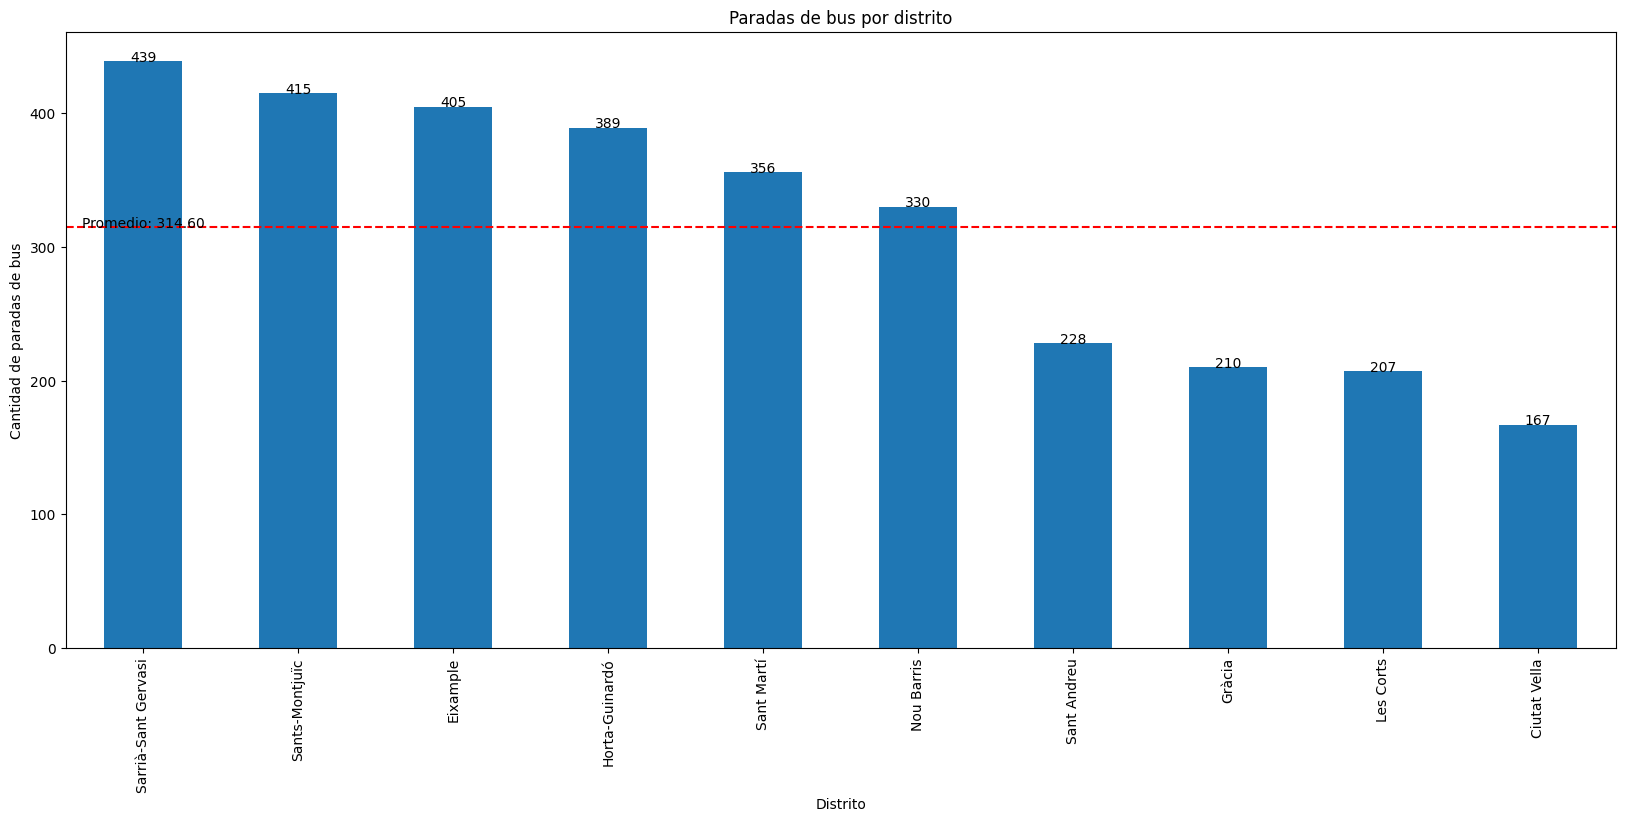

In [234]:
# Graficar la cantidad de paradas de bus por distrito
df_bus_stops['District.Name'].value_counts().plot(kind='bar', figsize=(20,8))

plt.title('Paradas de bus por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de paradas de bus')

# dibujar los valores arriba
for index, value in enumerate(df_bus_stops['District.Name'].value_counts()):
    plt.text(index, value, str(value), ha='center')
    
#promedio
plt.axhline(y=df_bus_stops['District.Name'].value_counts().mean(), color='r', linestyle='--', label='Promedio')
plt.text(0, df_bus_stops['District.Name'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_bus_stops['District.Name'].value_counts().mean()), ha='center')

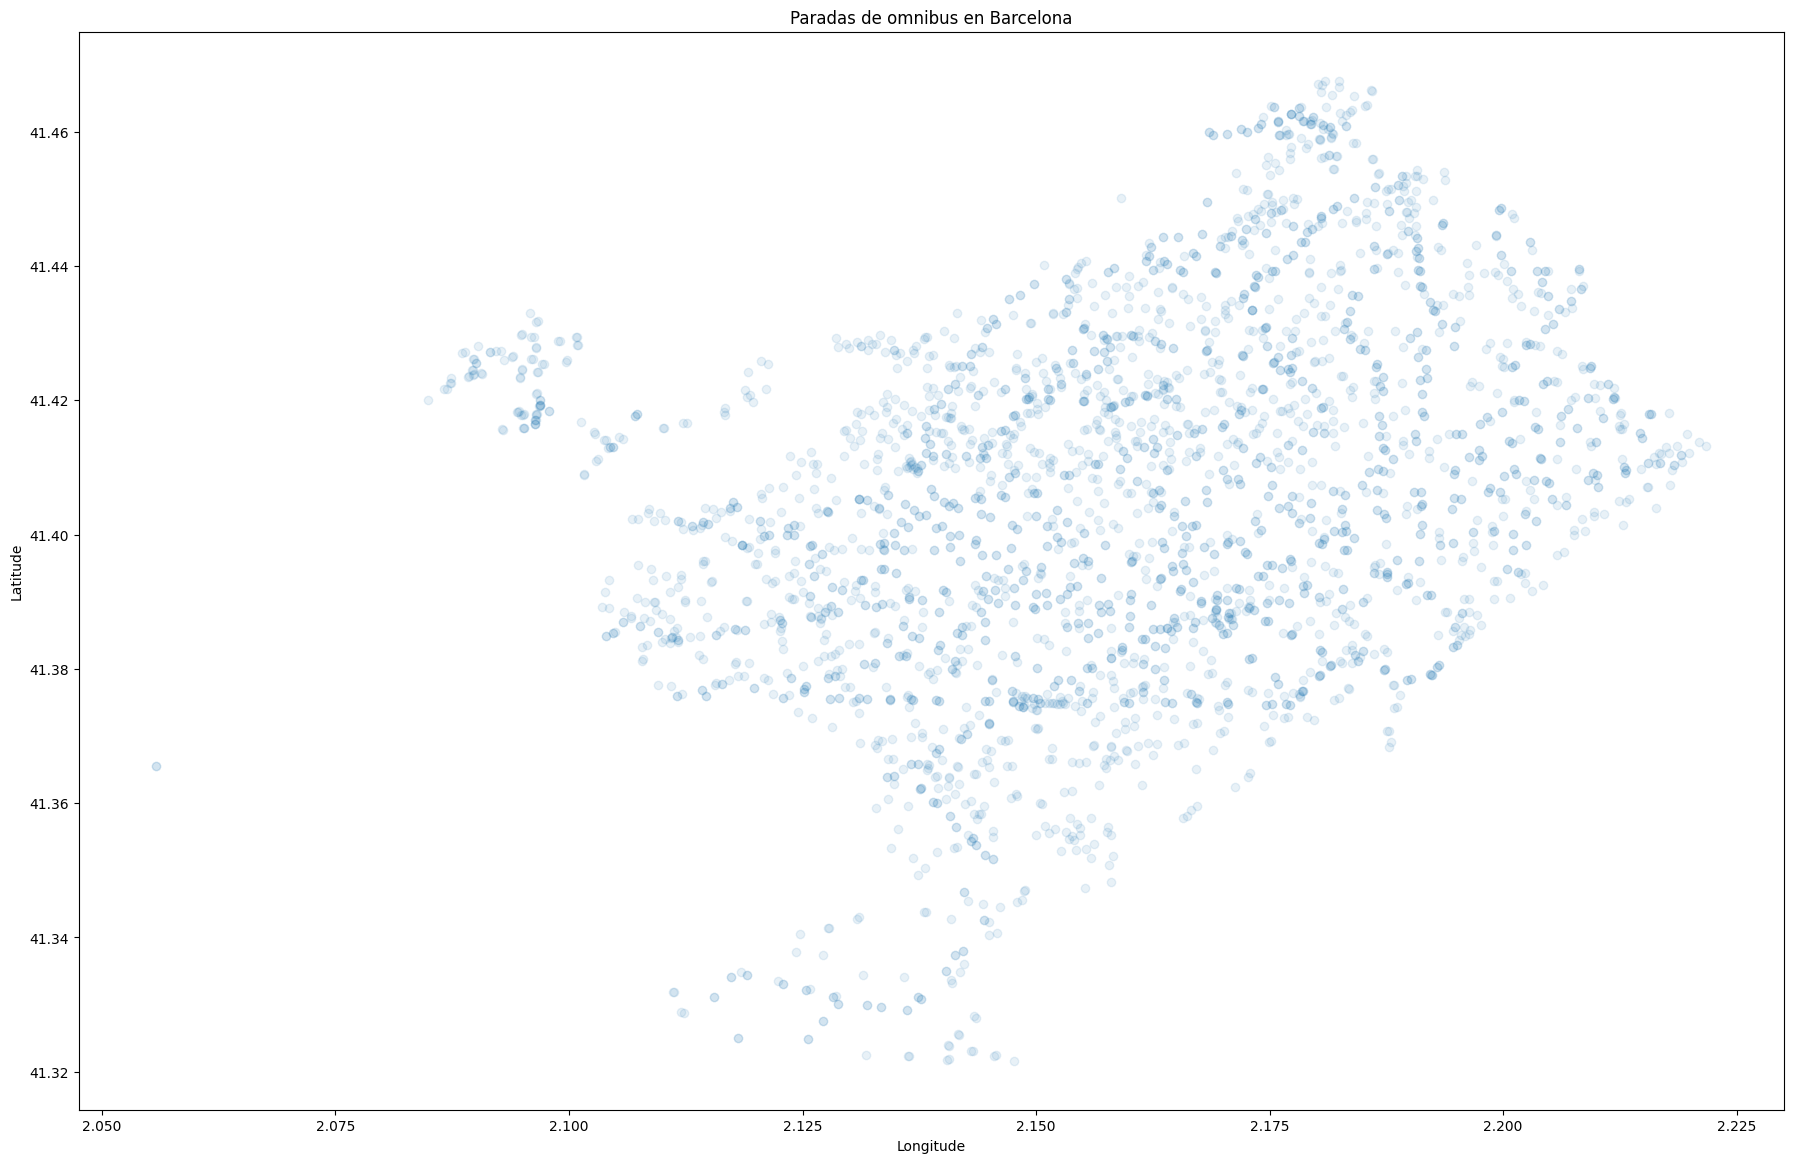

In [235]:
# Graficar las paradas de omnibus como puntos en un mapa con la latitud y la Longitud
plt.figure(figsize=(22,14))
plt.scatter(df_bus_stops['Longitude'], df_bus_stops['Latitude'], alpha=0.1)
plt.title('Paradas de omnibus en Barcelona')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [236]:
# Paradas de omnibus en el mapa de Barcelona
map_bus_stops = folium.Map(location=[41.388790, 2.158990], zoom_start=12)
#Agregar un punto y no un marcador
for index, row in df_bus_stops.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], radius=1, fill_color='blue').add_to(map_bus_stops)

# Graficar 
map_bus_stops

In [237]:
# Guardar el nuevo dataset bus stops
df_bus_stops.to_csv('../new_datasets/new_bus_stops.csv', index=False)

#### ********************************************************************************************
### Dataset: Deaths
archivo: `deaths.csv`
#### ********************************************************************************************

In [238]:
df_deaths.head()

Year  District.Code District.Name  Neighborhood.Code  \
0  2017              1  Ciutat Vella                  1   
1  2017              1  Ciutat Vella                  2   
2  2017              1  Ciutat Vella                  3   
3  2017              1  Ciutat Vella                  4   
4  2017              2      Eixample                  5   

                       Neighborhood.Name  Age  Number  
0                               el Raval  0-4       1  
1                         el Barri Gòtic  0-4       1  
2                         la Barceloneta  0-4       0  
3  Sant Pere, Santa Caterina i la Ribera  0-4       0  
4                          el Fort Pienc  0-4       0

In [239]:
df_deaths.shape

(4599, 7)

In [240]:
df_deaths.columns

Index(['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Age', 'Number'],
      dtype='object')

In [241]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               4599 non-null   int64 
 1   District.Code      4599 non-null   int64 
 2   District.Name      4599 non-null   object
 3   Neighborhood.Code  4599 non-null   int64 
 4   Neighborhood.Name  4599 non-null   object
 5   Age                4599 non-null   object
 6   Number             4599 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 251.6+ KB


In [242]:
df_deaths.describe()

Year  District.Code  Neighborhood.Code       Number
count  4599.000000    4599.000000        4599.000000  4599.000000
mean   2016.000000       6.246575          37.000000    10.051098
std       0.816585       2.788639          21.073599    18.559141
min    2015.000000       1.000000           1.000000     0.000000
25%    2015.000000       4.000000          19.000000     0.000000
50%    2016.000000       7.000000          37.000000     2.000000
75%    2017.000000       8.000000          55.000000    11.000000
max    2017.000000      10.000000          73.000000   139.000000

In [243]:
df_deaths.isnull().sum()

Year                 0
District.Code        0
District.Name        0
Neighborhood.Code    0
Neighborhood.Name    0
Age                  0
Number               0
dtype: int64

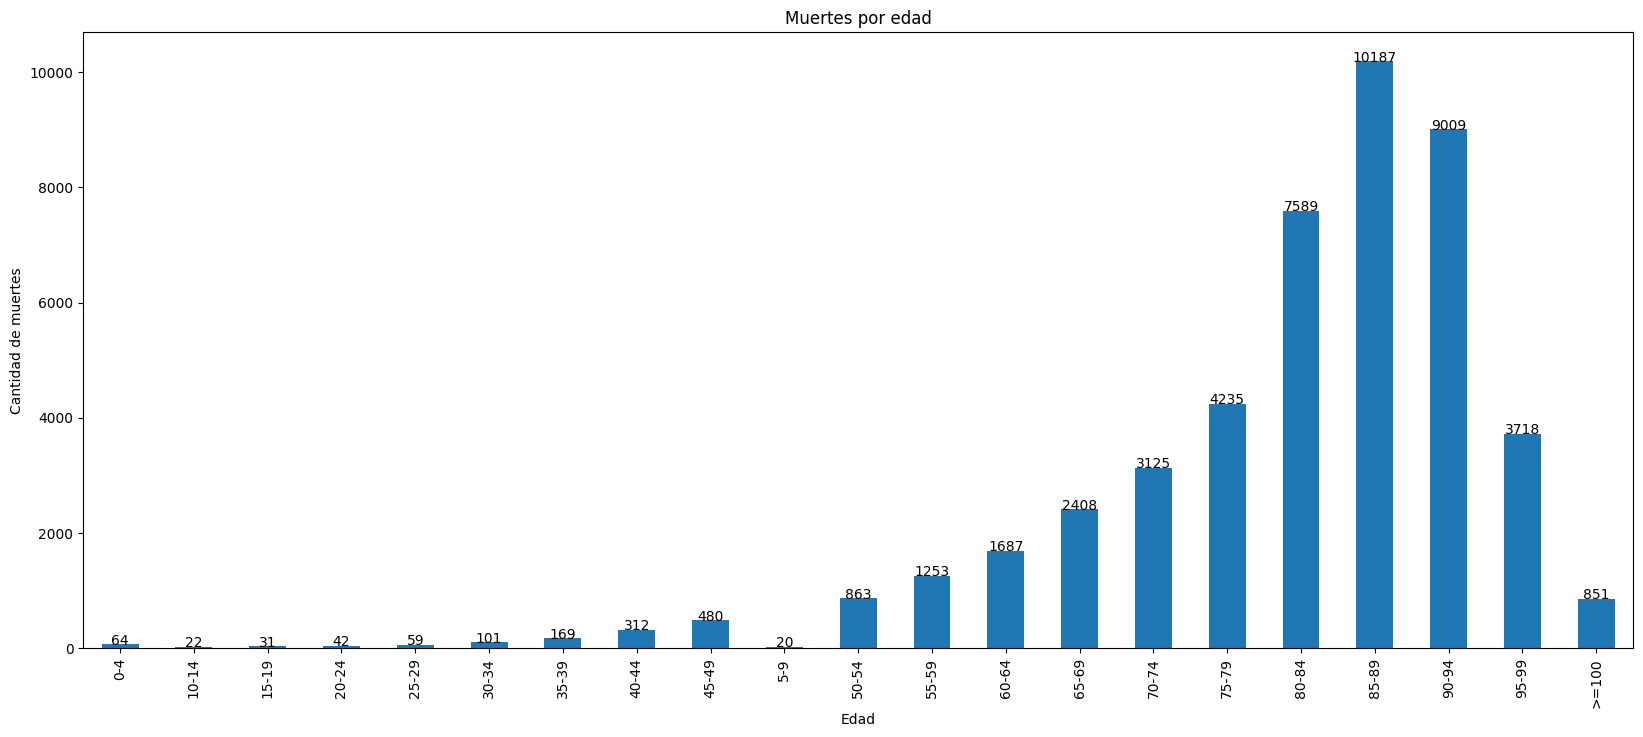

In [267]:
# Graficar la cantidad de muertes por edad
df_deaths.groupby('Age')['Number'].sum().plot(kind='bar', figsize=(20,8))

plt.title('Muertes por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de muertes')

# Agregarle el valor a cada barra
for index, value in enumerate(df_deaths.groupby('Age')['Number'].sum()):
    plt.text(index, value, str(value), ha='center')

# plotear
plt.show()

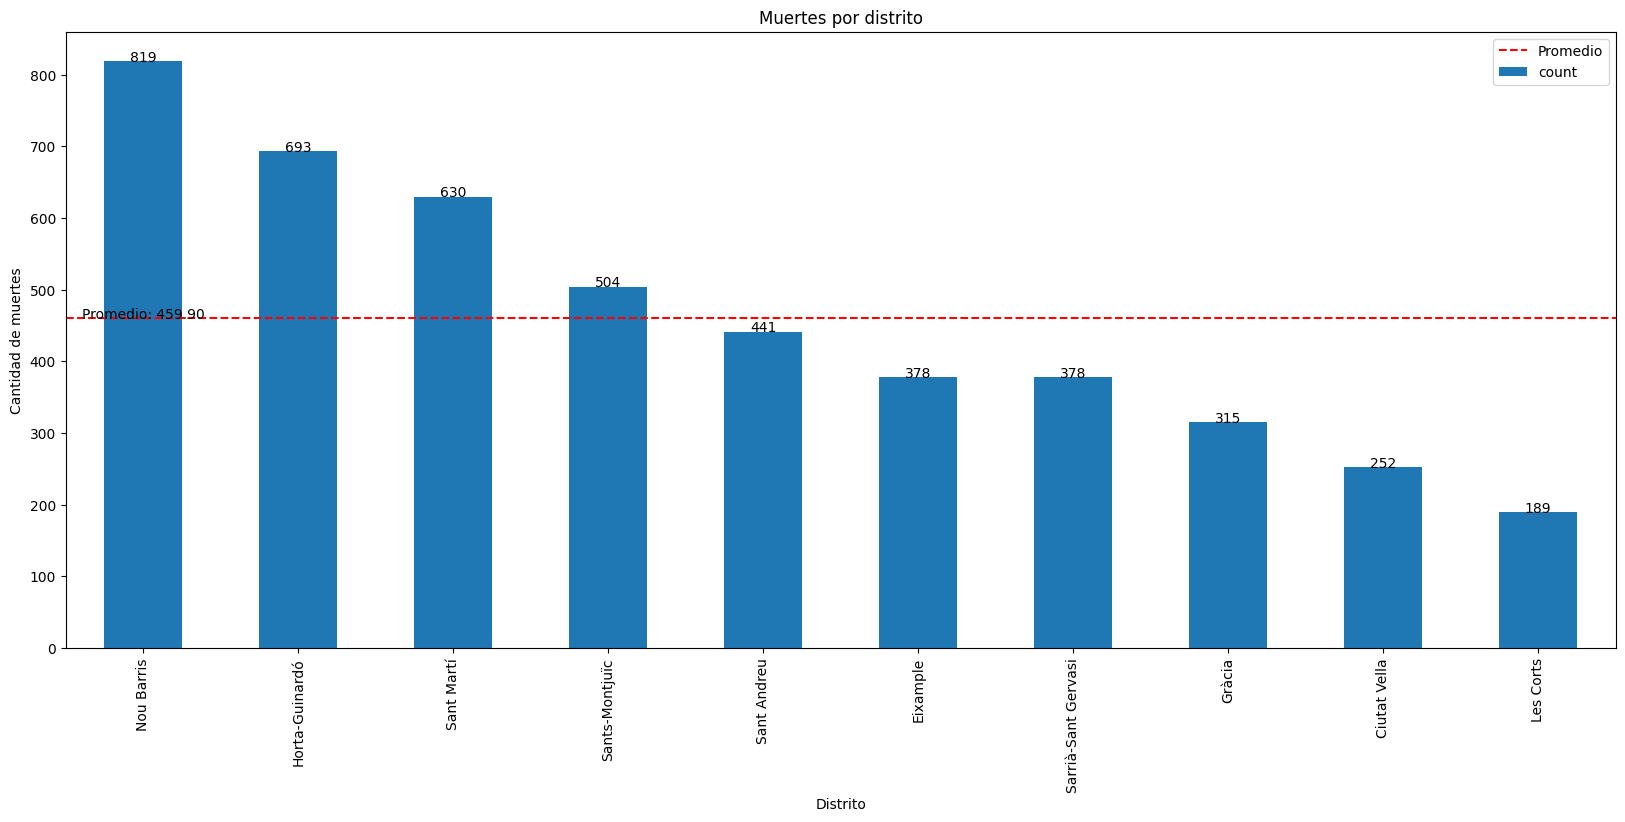

In [245]:
# Graficar la cantidad de muertes por distrito
df_deaths['District.Name'].value_counts().plot(kind='bar', figsize=(20,8))

plt.title('Muertes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de muertes')

# Agregarle el valor a cada barra
for index, value in enumerate(df_deaths['District.Name'].value_counts()):
    plt.text(index, value, str(value), ha='center')
    
# Linea de promedio
plt.axhline(y=df_deaths['District.Name'].value_counts().mean(), color='r', linestyle='--', label='Promedio')

plt.text(0, df_deaths['District.Name'].value_counts().mean(), 'Promedio: {:.2f}'.format(df_deaths['District.Name'].value_counts().mean()), ha='center')

plt.legend()    
# plotear
plt.show()

In [246]:
# Guardar el nuevo dataset deaths
df_deaths.to_csv('../new_datasets/new_deaths.csv', index=False)

#### ********************************************************************************************
### Dataset: Inmigrants by Nationality
archivo: `immigrants_by_nationality.csv`
#### ********************************************************************************************

In [247]:
df_immigrants_nationality.head()

Year  District Code District Name  Neighborhood Code  \
0  2017              1  Ciutat Vella                  1   
1  2017              1  Ciutat Vella                  2   
2  2017              1  Ciutat Vella                  3   
3  2017              1  Ciutat Vella                  4   
4  2017              2      Eixample                  5   

                       Neighborhood Name Nationality  Number  
0                               el Raval       Spain    1109  
1                         el Barri Gòtic       Spain     482  
2                         la Barceloneta       Spain     414  
3  Sant Pere, Santa Caterina i la Ribera       Spain     537  
4                          el Fort Pienc       Spain     663

In [248]:
df_immigrants_nationality.shape

(35224, 7)

In [249]:
df_immigrants_nationality.columns

Index(['Year', 'District Code', 'District Name', 'Neighborhood Code',
       'Neighborhood Name', 'Nationality', 'Number'],
      dtype='object')

In [250]:
df_immigrants_nationality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35224 entries, 0 to 35223
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               35224 non-null  int64 
 1   District Code      35224 non-null  int64 
 2   District Name      35224 non-null  object
 3   Neighborhood Code  35224 non-null  int64 
 4   Neighborhood Name  35224 non-null  object
 5   Nationality        35224 non-null  object
 6   Number             35224 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [251]:
df_immigrants_nationality.describe()

Year  District Code  Neighborhood Code        Number
count  35224.000000   35224.000000       35224.000000  35224.000000
mean    2016.010504       7.500000          37.837838      7.707273
std        0.810846      11.061717          22.119174     50.421883
min     2015.000000       1.000000           1.000000      0.000000
25%     2015.000000       4.000000          19.000000      0.000000
50%     2016.000000       7.000000          37.500000      0.000000
75%     2017.000000       8.000000          56.000000      2.000000
max     2017.000000      99.000000          99.000000   1603.000000

In [252]:
df_immigrants_nationality.isnull().sum()

Year                 0
District Code        0
District Name        0
Neighborhood Code    0
Neighborhood Name    0
Nationality          0
Number               0
dtype: int64

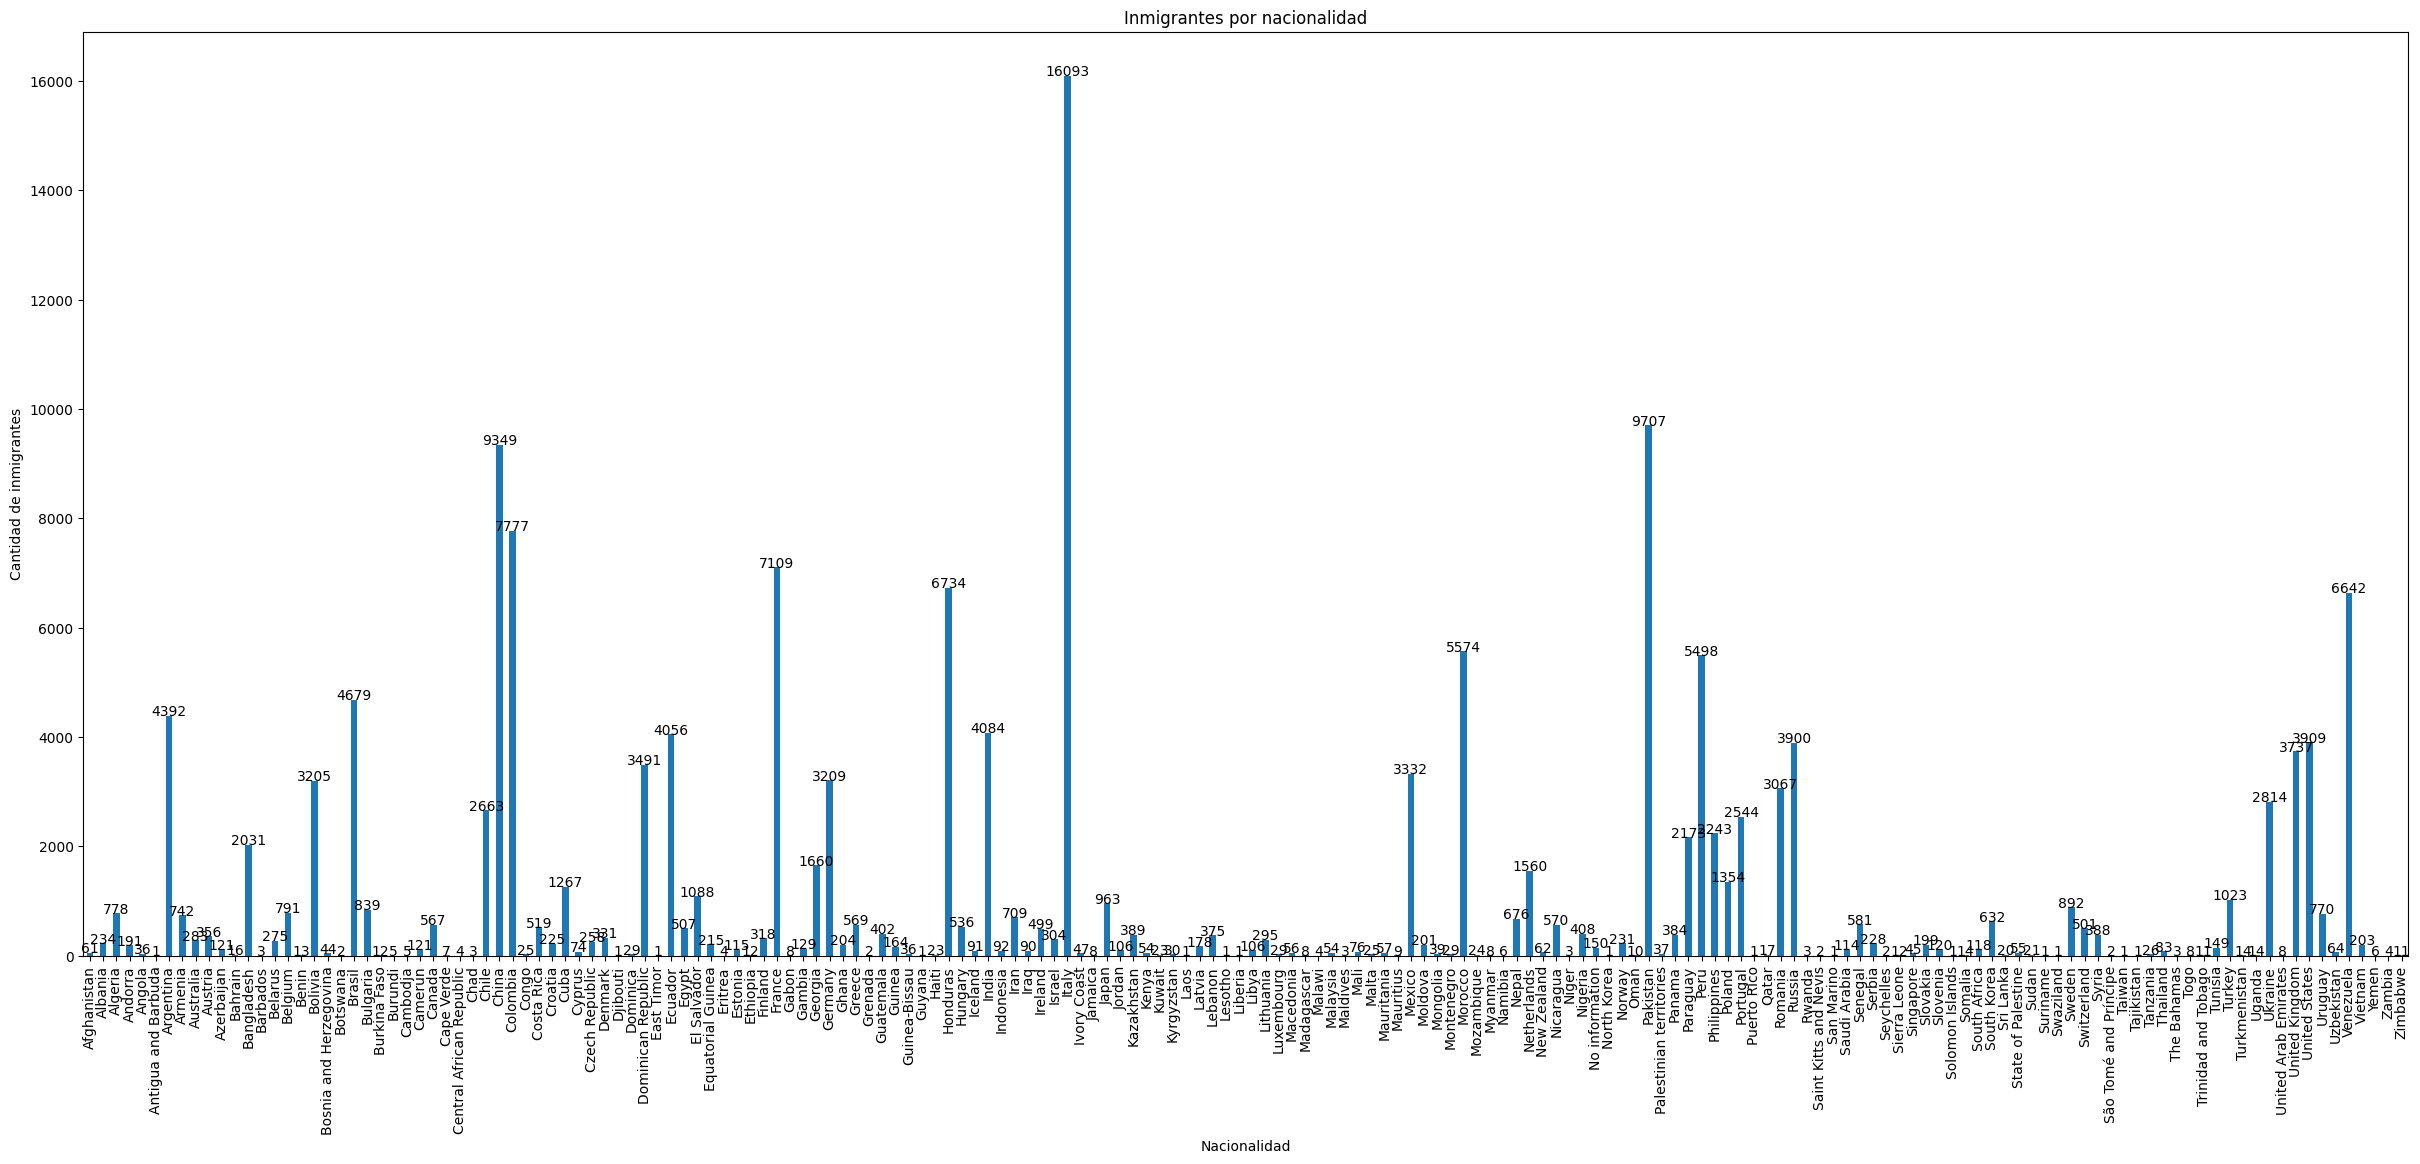

In [279]:
# Graficar la cantidad de inmigrantes por nacionalidad

# eliminar de la tabla de Nationality todos los valores de Spain
df_immigrants_nationality = df_immigrants_nationality[df_immigrants_nationality['Nationality'] != 'Spain']

df_immigrants_nationality.groupby('Nationality')['Number'].sum().plot(kind='bar', figsize=(30,12))

plt.title('Inmigrantes por nacionalidad')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de inmigrantes')

# Agregarle el valor a cada barra
for index, value in enumerate(df_immigrants_nationality.groupby('Nationality')['Number'].sum()):
    plt.text(index, value, str(value), ha='center')

# plotear
plt.show()

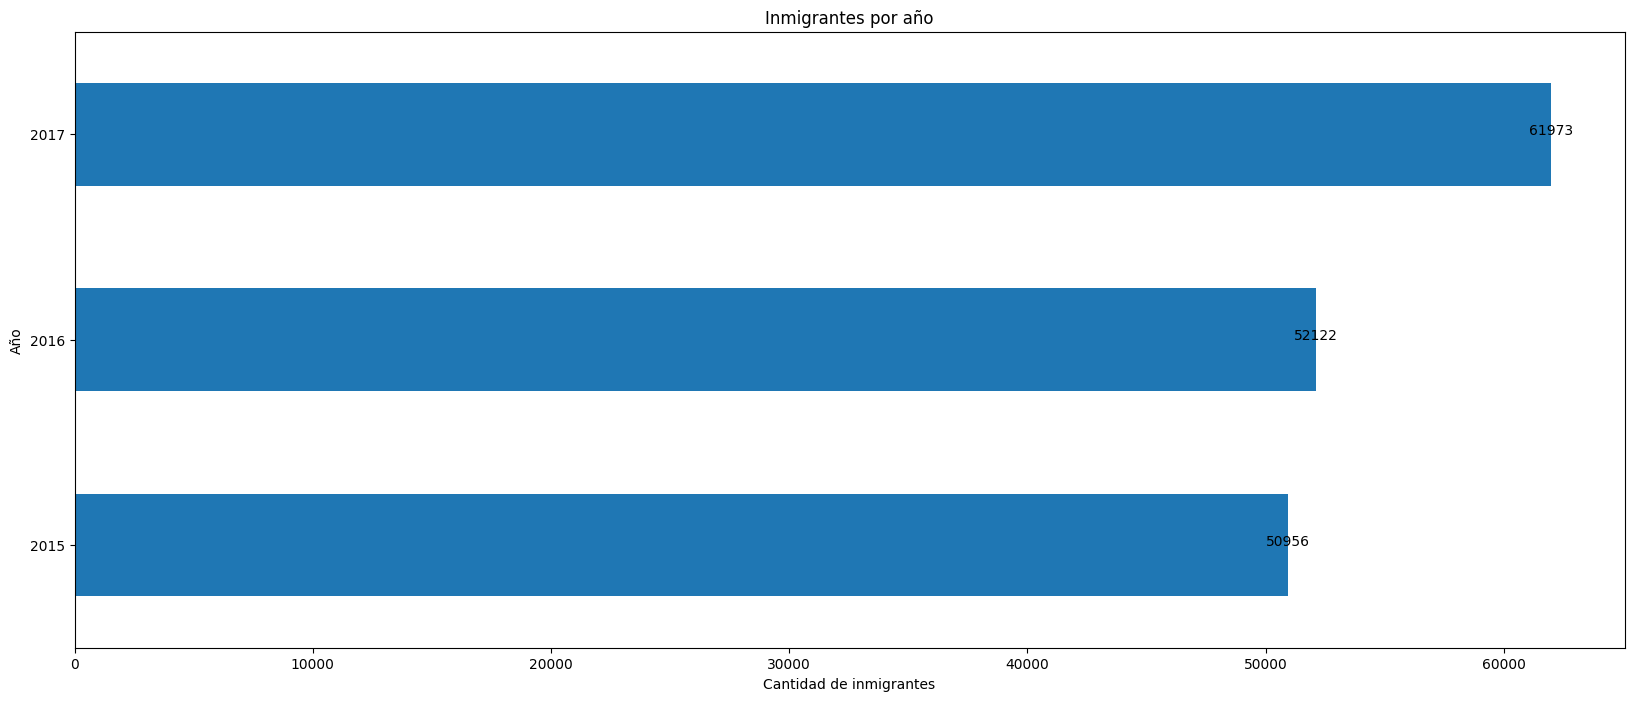

In [289]:
# graficar cantidad de inmigrantes por año
df_immigrants_nationality.groupby('Year')['Number'].sum().plot(kind='barh', figsize=(20,8))

plt.title('Inmigrantes por año')
plt.xlabel('Cantidad de inmigrantes')
plt.ylabel('Año')

# Agregarle el valor a cada barra
for index, value in enumerate(df_immigrants_nationality.groupby('Year')['Number'].sum()):
    plt.text(value, index, str(value), ha='center')
    
# plotear
plt.show()

In [290]:
# Guardar el nuevo dataset immigrants by nationality
df_immigrants_nationality.to_csv('../new_datasets/new_immigrants_nationality.csv', index=False)

#### ********************************************************************************************
### Dataset: Inmigrants Emigrants by Age
archivo: `immigrants_emigrants_by_age.csv`
#### ********************************************************************************************

In [254]:
df_immigrants_age.head()

Year  District Code District Name  Neighborhood Code  \
0  2017              1  Ciutat Vella                  1   
1  2017              1  Ciutat Vella                  2   
2  2017              1  Ciutat Vella                  3   
3  2017              1  Ciutat Vella                  4   
4  2017              2      Eixample                  5   

                       Neighborhood Name  Age  Immigrants  Emigrants  
0                               el Raval  0-4         154        108  
1                         el Barri Gòtic  0-4          58         33  
2                         la Barceloneta  0-4          38         37  
3  Sant Pere, Santa Caterina i la Ribera  0-4          56         55  
4                          el Fort Pienc  0-4          79         60

In [291]:
df_immigrants_age.shape

(4662, 8)

In [292]:
df_immigrants_age.columns

Index(['Year', 'District Code', 'District Name', 'Neighborhood Code',
       'Neighborhood Name', 'Age', 'Immigrants', 'Emigrants'],
      dtype='object')

In [293]:
df_immigrants_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               4662 non-null   int64 
 1   District Code      4662 non-null   int64 
 2   District Name      4662 non-null   object
 3   Neighborhood Code  4662 non-null   int64 
 4   Neighborhood Name  4662 non-null   object
 5   Age                4662 non-null   object
 6   Immigrants         4662 non-null   int64 
 7   Emigrants          4662 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 291.5+ KB


In [294]:
df_immigrants_age.describe()

Year  District Code  Neighborhood Code   Immigrants    Emigrants
count  4662.000000    4662.000000        4662.000000  4662.000000  4662.000000
mean   2016.000000       7.500000          37.837838    58.232733    33.684041
std       0.816584      11.062746          22.121233   108.970536    45.925365
min    2015.000000       1.000000           1.000000     0.000000     0.000000
25%    2015.000000       4.000000          19.000000     5.000000     6.000000
50%    2016.000000       7.000000          37.500000    21.000000    18.000000
75%    2017.000000       8.000000          56.000000    64.000000    42.000000
max    2017.000000      99.000000          99.000000  1393.000000   451.000000

In [295]:
df_immigrants_age.isnull().sum()

Year                 0
District Code        0
District Name        0
Neighborhood Code    0
Neighborhood Name    0
Age                  0
Immigrants           0
Emigrants            0
dtype: int64

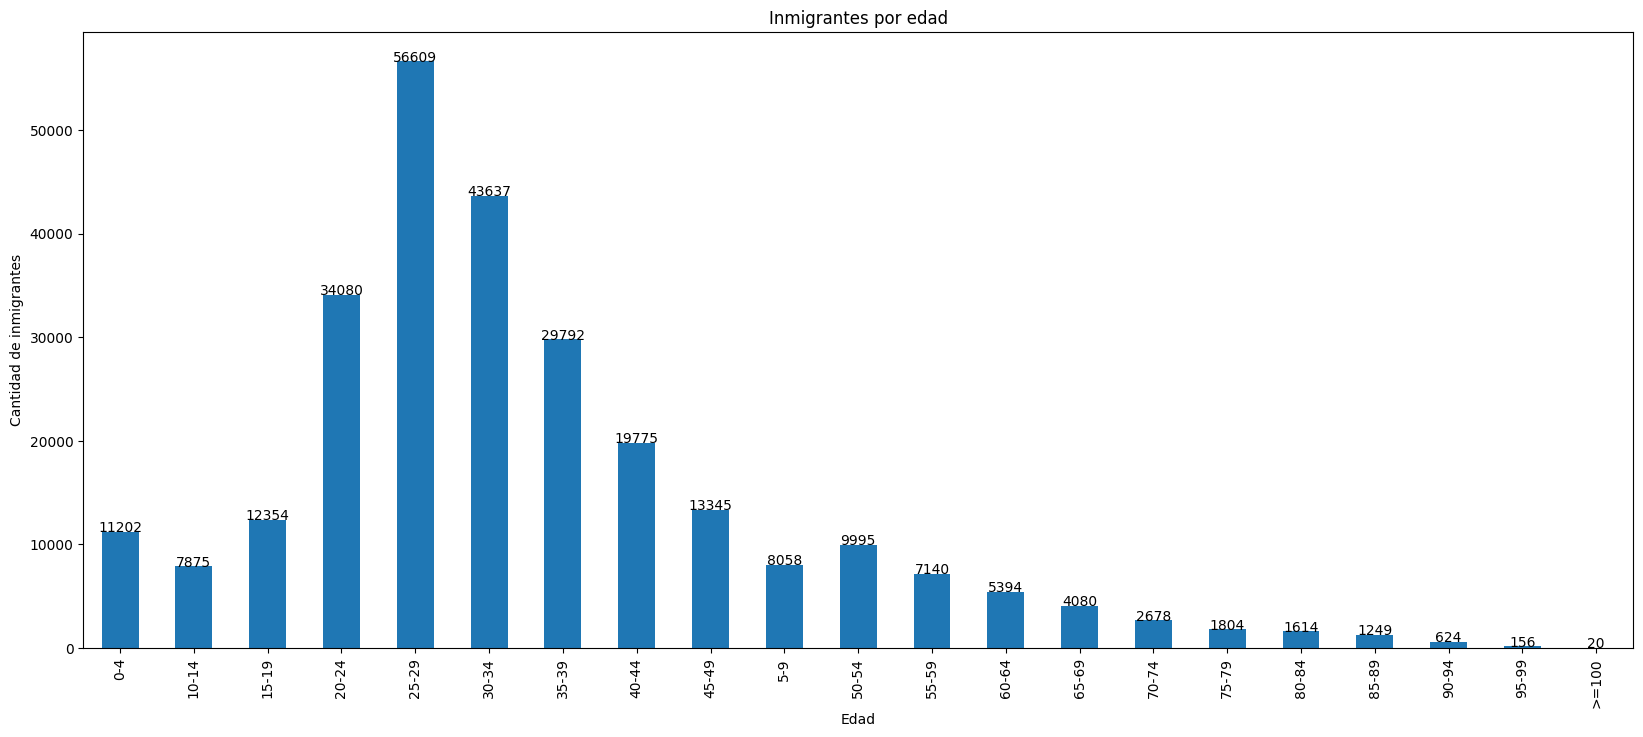

In [308]:
# Graficar la cantidad de inmigrantes por edad
df_immigrants_age.groupby('Age')['Immigrants'].sum().plot(kind='bar', figsize=(20,8))

plt.title('Inmigrantes por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de inmigrantes')

# Agregarle el valor a cada barra
for index, value in enumerate(df_immigrants_age.groupby('Age')['Immigrants'].sum()):
    plt.text(index, value, str(value), ha='center')

# plotear
plt.show()

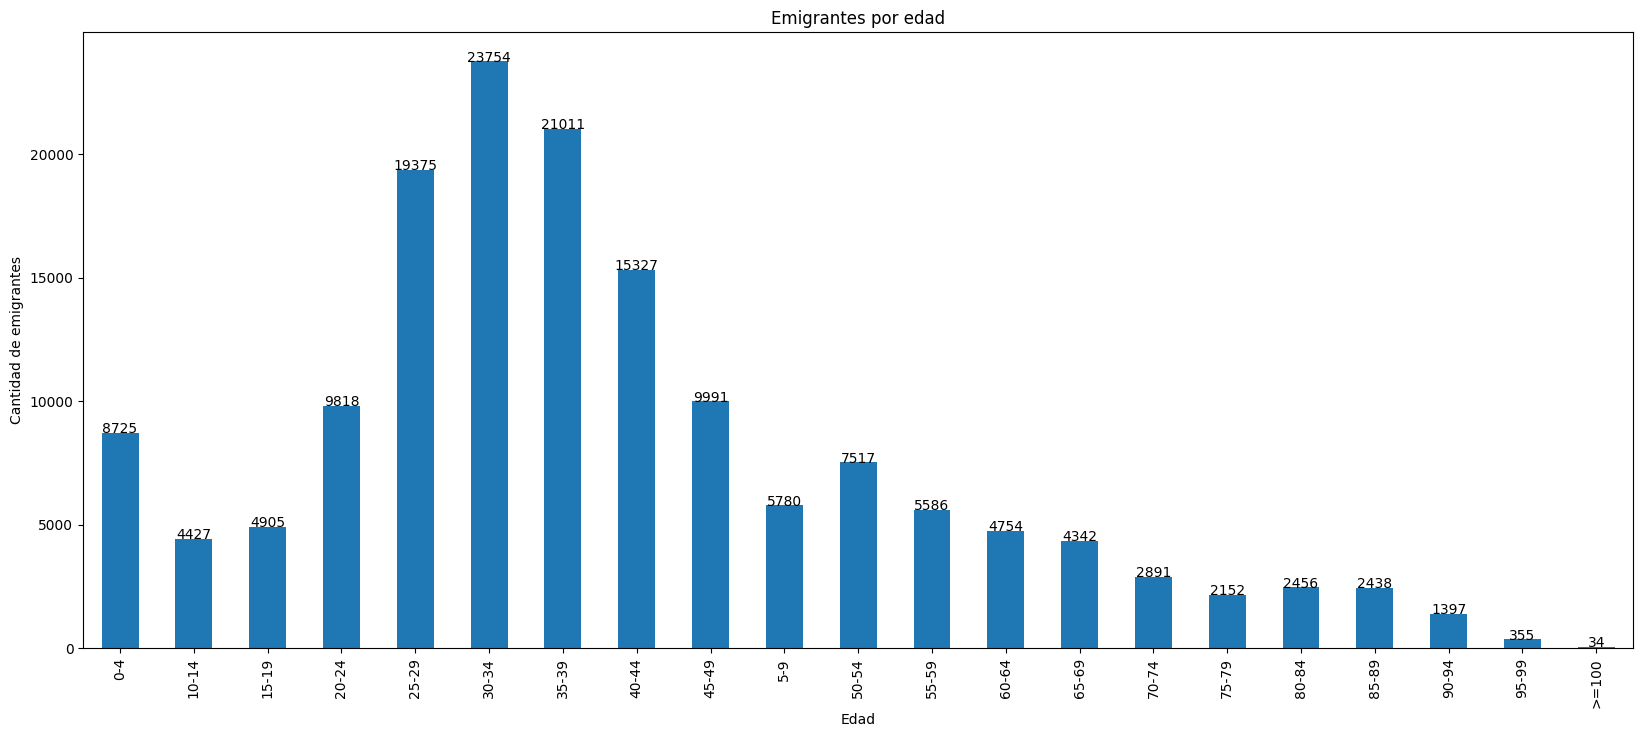

In [309]:
# Graficar la cantidad de emigrantes por edad
df_immigrants_age.groupby('Age')['Emigrants'].sum().plot(kind='bar', figsize=(20,8))

plt.title('Emigrantes por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de emigrantes')

# Agregarle el valor a cada barra
for index, value in enumerate(df_immigrants_age.groupby('Age')['Emigrants'].sum()):
    plt.text(index, value, str(value), ha='center')

# plotear
plt.show()

In [310]:
# Guardar el nuevo dataset 
df_immigrants_age.to_csv('../new_datasets/new_immigrants_age.csv', index=False)

#### ********************************************************************************************
### Dataset: Inmigrants Emigrants by Destination 1 y 2
archivo: `immigrants_emigrants_by_destination.csv`, `immigrants_emigrants_by_destination2.csv`
#### ********************************************************************************************

In [319]:
df_immigrants_destination1.head()

from         to  weight
0            Abroad  Barcelona   53085
1         Andalusia  Barcelona    2416
2            Aragon  Barcelona     811
3          Asturias  Barcelona     323
4  Balearic Islands  Barcelona    1634

In [318]:
df_immigrants_destination2.head()

from                  to  weight
0  Ciutat Vella           Andalusia     188
1  Ciutat Vella              Aragon      64
2  Ciutat Vella      Canary Islands      95
3  Ciutat Vella           Cantabria      17
4  Ciutat Vella  Castilla-La Mancha      23

In [320]:
# Unir los dos datasets en uno solo
df_immigrants_destination = pd.concat([df_immigrants_destination1, df_immigrants_destination2], axis=0)

In [322]:
df_immigrants_destination.shape

(440, 3)

In [323]:
df_immigrants_destination.columns

Index(['from', 'to', 'weight'], dtype='object')

#### ********************************************************************************************
### Dataset: Inmigrants Emigrants by Sex
archivo: `immigrants_emigrants_by_sex.csv`
#### ********************************************************************************************

In [257]:
df_immigrants_sex.head()

Year  District Code District Name  Neighborhood Code  \
0  2017              1  Ciutat Vella                  1   
1  2017              1  Ciutat Vella                  2   
2  2017              1  Ciutat Vella                  3   
3  2017              1  Ciutat Vella                  4   
4  2017              2      Eixample                  5   

                       Neighborhood Name Gender  Immigrants  Emigrants  
0                               el Raval   Male        3063       1195  
1                         el Barri Gòtic   Male        1499        427  
2                         la Barceloneta   Male         910        361  
3  Sant Pere, Santa Caterina i la Ribera   Male        1438        502  
4                          el Fort Pienc   Male        1082        495

#### ********************************************************************************************
### Dataset: Life Expectancy
archivo: `life_expectancy.csv`
#### ********************************************************************************************

In [258]:
df_life_expectancy.head()

Neighborhood  2006-2010  2007-2011  2008-2012  \
0                               el Raval       87.5       84.9       84.7   
1                         el Barri Gòtic       88.0       84.3       84.4   
2                         la Barceloneta       88.2       85.3       84.4   
3  Sant Pere, Santa Caterina i la Ribera       88.9       85.9       86.1   
4                          el Fort Pienc       89.7       87.1       87.2   

   2009-2013  2010-2014  Gender  
0       84.9       85.3  Female  
1       87.5       84.4  Female  
2       86.3       84.7  Female  
3       85.5       85.3  Female  
4       87.7       86.7  Female

#### ********************************************************************************************
### Dataset: Most Frequent Baby Names
archivo: `most_frequent_baby_names.csv`
#### ********************************************************************************************

In [259]:
df_baby_names.head()

Order    Name  Gender  Year  Frequency
0      1   LAURA  Female  1996        237
1      2   MARIA  Female  1996        219
2      3   MARTA  Female  1996        206
3      4  ANDREA  Female  1996        199
4      5    ANNA  Female  1996        195

#### ********************************************************************************************
### Dataset: Most Frequent Names
archivo: `most_frequent_names.csv`
#### ********************************************************************************************

In [260]:
df_frequent_names.head()

Order        Name  Gender       Decade  Frequency
0      1       MARIA  Female  Before 1930       2085
1      2      CARMEN  Female  Before 1930       1463
2      3      JOSEFA  Female  Before 1930       1032
3      4  MONTSERRAT  Female  Before 1930        879
4      5        ROSA  Female  Before 1930        762

#### ********************************************************************************************
### Dataset: Population
archivo: `population.csv`
#### ********************************************************************************************

In [261]:
df_population.head()

Year  District.Code District.Name  Neighborhood.Code  \
0  2017              1  Ciutat Vella                  1   
1  2017              1  Ciutat Vella                  2   
2  2017              1  Ciutat Vella                  3   
3  2017              1  Ciutat Vella                  4   
4  2017              2      Eixample                  5   

                       Neighborhood.Name Gender  Age  Number  
0                               el Raval   Male  0-4     224  
1                         el Barri Gòtic   Male  0-4      50  
2                         la Barceloneta   Male  0-4      43  
3  Sant Pere, Santa Caterina i la Ribera   Male  0-4      95  
4                          el Fort Pienc   Male  0-4     124

#### ********************************************************************************************
### Dataset: Transports
archivo: `transports.csv`
#### ********************************************************************************************

In [262]:
df_transports.head()

Code    Transport  Longitude   Latitude  \
0  K001  Underground   2.119370  41.399203   
1  K001  Underground   2.135427  41.397791   
2  K001  Underground   2.185391  41.451492   
3  K001  Underground   2.174473  41.460889   
4  K001  Underground   2.168588  41.387200   

                                             Station        District.Name  \
0  FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...  Sarrià-Sant Gervasi   
1                            FGC (L6) - LA BONANOVA-  Sarrià-Sant Gervasi   
2      METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-           Nou Barris   
3    METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-           Nou Barris   
4         METRO (L1) - CATALUNYA (Rda. Universitat)-             Eixample   

        Neighborhood.Name  
0                  Sarrià  
1  Sant Gervasi - Galvany  
2        la Trinitat Nova  
3        Ciutat Meridiana  
4  la Dreta de l'Eixample

#### ********************************************************************************************
### Dataset: Unemployment
archivo: `unemployment.csv`
#### ********************************************************************************************

In [263]:
df_unemployment.head()

Year    Month  District Code District Name  Neighborhood Code  \
0  2017  January              1  Ciutat Vella                  1   
1  2017  January              1  Ciutat Vella                  2   
2  2017  January              1  Ciutat Vella                  3   
3  2017  January              1  Ciutat Vella                  4   
4  2017  January              2      Eixample                  5   

                       Neighborhood Name Gender      Demand_occupation  Number  
0                               el Raval   Male  Registered unemployed    2107  
1                         el Barri Gòtic   Male  Registered unemployed     538  
2                         la Barceloneta   Male  Registered unemployed     537  
3  Sant Pere, Santa Caterina i la Ribera   Male  Registered unemployed     741  
4                          el Fort Pienc   Male  Registered unemployed     630